## Подключение библиотек

In [1]:
from bs4 import BeautifulSoup as bs

Beautiful Soup - это библиотека Python для извлечения данных из HTML и XML файлов.

In [2]:
import requests

Библиотека requests является стандартным инструментом для составления HTTP-запросов в Python.

In [3]:
import pandas as pd

C:\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Получение информаций

In [4]:
# GET - запрос
url = 'https://www.kinonews.ru/top250imdb_p2/' # страница со всеми статьями 
page = requests.get(url)

In [5]:
page.status_code

200

In [6]:
soup = bs(page.text, 'html.parser')

In [7]:
page.text

'<!DOCTYPE html>\n<html lang="ru">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=yes">\n<link rel="icon" href="https://www.kinonews.ru/favicon.ico" type="image/x-icon">\n<link rel="shortcut icon" href="https://www.kinonews.ru/favicon.ico" type="image/x-icon">\n<meta property="twitter:domain" content="KinoNews.ru">\n<meta property="twitter:card" content="summary_large_image">\n<meta property="twitter:site" content="@KinoNewsRu">\n<meta name="twitter:creator" content="@KinoNewsRu">\n<meta name="twitter:card" content="summary_large_image">\n<title>Топ 250 лучших фильмов по версии портала о кино IMDb, страница 2</title>\n<meta name=\'title\' content=\'Топ 250 лучших фильмов по версии портала о кино IMDb, страница 2\'>\n<meta name=\'keywords\' content=\'топ 250 фильмов, топ 250 imdb, топ 250 лучших фильмов, топ 250 фильмов imdb, рейтинг imdb топ 250, страница 2\'>\t\n<meta name=

In [8]:
soup

<!DOCTYPE html>

<html lang="ru">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width, initial-scale=1, user-scalable=yes" name="viewport"/>
<link href="https://www.kinonews.ru/favicon.ico" rel="icon" type="image/x-icon"/>
<link href="https://www.kinonews.ru/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<meta content="KinoNews.ru" property="twitter:domain"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="@KinoNewsRu" property="twitter:site"/>
<meta content="@KinoNewsRu" name="twitter:creator"/>
<meta content="summary_large_image" name="twitter:card"/>
<title>Топ 250 лучших фильмов по версии портала о кино IMDb, страница 2</title>
<meta content="Топ 250 лучших фильмов по версии портала о кино IMDb, страница 2" name="title"/>
<meta content="топ 250 фильмов, топ 250 imdb, топ 250 лучших фильмов, топ 250 фильмов imdb, рейтинг imdb топ 250, страница 2" name="keywords"/>
<meta content="Список 250

In [9]:
result_list = {'title_russia': [], 'title_english':[], 'date': [], 'country':[], 'genre': [],'duration': [],'rating': [], 'description': []}

In [10]:
pagenum = 1
for i in range(5):
    url = f'https://www.kinonews.ru/top250imdb_p{pagenum}/'
    page = requests.get(url)
    soup = bs(page.text, 'html.parser')
    
    titles = soup.find_all('a', class_='titlefilm')
    
    for i in titles: 
        # Переход на страницу статьи
        url_film = 'https://www.kinonews.ru' + i.get('href') 
        page_film = requests.get(url_film)
        soup_film = bs(page_film.text, 'html.parser')
        
        # Название фильма
        name_film_rus = soup_film.find('h1', class_='film') 
        name_film_eng = soup_film.find('div', class_='entitle')
        
        # Дата выпуска фильма
        release_date = soup_film.find('td', string="Год выпуска:")
        if release_date:
            release_date = release_date.find_next_sibling('td').text.strip()
        
        # Страны выпуска фильма
        meta_tags = soup_film.find_all('meta', {'itemprop': 'countryOfOrigin'})
        if meta_tags:
            countries = [tag['content'] for tag in meta_tags]
            country = ', '.join(countries)
        else:
            country = 'N/A'  
        # Жанр
        genre_tags = soup_film.find_all('span', itemprop="genre")
        # Берем только первый жанр (если есть)
        recommend_genre = genre_tags[0].text.strip() if genre_tags else 'N/A'
            
        # Длительность фильма        
        duration_film = soup_film.find('td', string="Продолжительность:")
        duration = duration_film.find_next_sibling('td').text.strip() if duration_film else 'N/A'
        
        # Рейтинг
        rating_film = soup_film.find('meta', itemprop="ratingValue")
        rating = rating_film.get('content')
        
        # Описание фильма
        discription_film = soup_film.find('div', itemprop="description") 
        if discription_film:
            discription_film = discription_film.text.strip()
            
            
        if name_film_rus:
            result_list['title_russia'].append(name_film_rus.text.strip())
            result_list['title_english'].append(name_film_eng.text.strip() if name_film_eng else 'N/A')
            result_list['date'].append(release_date)
            result_list['country'].append(country)
            result_list['genre'].append(recommend_genre)
            result_list['duration'].append(duration)
            result_list['rating'].append(rating)
            result_list['description'].append(discription_film)
            
    pagenum += 1

Провели парсинг сайта кино, где определили основные признаки

In [11]:
result_list

{'title_russia': ['Побег из Шоушенка',
  'Крестный отец',
  'Темный рыцарь',
  'Крестный отец 2',
  '12 разгневанных мужчин',
  'Список Шиндлера',
  'Властелин колец 3: Возвращение Короля',
  'Криминальное чтиво',
  'Властелин колец: Братство кольца',
  'Хороший, плохой, злой',
  'Форрест Гамп',
  'Властелин колец 2: Две крепости',
  'Бойцовский клуб',
  'Начало',
  'Звездные войны: Эпизод 5 - Империя наносит ответный удар',
  'Матрица',
  'Славные парни',
  'Пролетая над гнездом кукушки',
  'Интерстеллар',
  'Семь',
  'Эта замечательная жизнь',
  'Семь самураев',
  'Молчание ягнят',
  'Спасти рядового Райана',
  'Город Бога',
  'Жизнь прекрасна',
  'Зеленая миля',
  'Терминатор 2: Судный день',
  'Звездные войны: Эпизод 4 - Новая надежда',
  'Назад в будущее',
  'Унесенные призраками',
  'Пианист',
  'Паразиты',
  'Психо',
  'Гладиатор',
  'Король Лев',
  'Человек-паук: Паутина вселенных',
  'Отступники',
  'Одержимость',
  'Американская история Х',
  'Леон',
  'Могила светлячков',
  

In [12]:
print("Количество нулевых значений в: ")
for i in result_list:
    print( i + " - " + str(result_list[i].count(None)))

Количество нулевых значений в: 
title_russia - 0
title_english - 0
date - 0
country - 0
genre - 0
duration - 0
rating - 0
description - 0


## Сохранение данных

In [13]:
file_name = 'film.csv'
df = pd.DataFrame(data=result_list)
df.to_csv(file_name)

In [14]:
df.head(10)

,title_russia,title_english,date,country,genre,duration,rating,description
0,Побег из Шоушенка,The Shawshank Redemption,1994,США,драма,142 мин.,9.44,"""Побег из Шоушенка"" - фильм, который считается..."
1,Крестный отец,The Godfather,1972,США,драма,175 мин.,9.11,"Фильм, ставший классикой своего жанра, рассказ..."
2,Темный рыцарь,The Dark Knight,2008,США,боевик,152 мин.,9.12,Бэтман вершит правосудие в Готэме. Его партнер...
3,Крестный отец 2,The Godfather: Part II,1974,США,драма,202 мин.,8.88,Продолжение эпохальной саги режиссера Френсиса...
4,12 разгневанных мужчин,12 Angry Men,1957,США,детектив,96 мин.,9.15,Один из 12 присяжных в деле об убийстве пытае...
5,Список Шиндлера,Schindler`s List,1993,США,биографический,195 мин.,9.19,Немецкий фабрикант и член нацистской партии Ос...
6,Властелин колец 3: Возвращение Короля,The Lord of the Rings: The Return of the King,2003,"США, Новая Зеландия",боевик,201 мин.,9.48,Близится последняя битва за Средиземье. На пут...
7,Криминальное чтиво,Pulp Fiction,1994,США,драма,154 мин.,8.94,Три истории из жизни двух бандитов - Винсента ...
8,Властелин колец: Братство кольца,The Lord of the Rings: The Fellowship of the Ring,2001,"США, Новая Зеландия",боевик,178 мин.,9.33,Поиски великого кольца Саурона завершены. Оно ...
9,"Хороший, плохой, злой","The Good, the Bad and the Ugly",1966,"Италия, Испания, Германия (ФРГ), США",боевик,161 мин.,8.96,Действие происходит в разгар гражданской войны...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title_russia   249 non-null    object
 1   title_english  249 non-null    object
 2   date           249 non-null    object
 3   country        249 non-null    object
 4   genre          249 non-null    object
 5   duration       249 non-null    object
 6   rating         249 non-null    object
 7   description    249 non-null    object
dtypes: object(8)
memory usage: 15.7+ KB


In [16]:
df.shape

(249, 8)

In [17]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

import re
import nltk
import pymorphy3

from nltk.stem.snowball import SnowballStemmer

In [20]:
df = pd.read_csv('film.csv')

In [21]:
df.head()

,Unnamed: 0,title_russia,title_english,date,country,genre,duration,rating,description
0,0,Побег из Шоушенка,The Shawshank Redemption,1994,США,драма,142 мин.,9.44,"""Побег из Шоушенка"" - фильм, который считается..."
1,1,Крестный отец,The Godfather,1972,США,драма,175 мин.,9.11,"Фильм, ставший классикой своего жанра, рассказ..."
2,2,Темный рыцарь,The Dark Knight,2008,США,боевик,152 мин.,9.12,Бэтман вершит правосудие в Готэме. Его партнер...
3,3,Крестный отец 2,The Godfather: Part II,1974,США,драма,202 мин.,8.88,Продолжение эпохальной саги режиссера Френсиса...
4,4,12 разгневанных мужчин,12 Angry Men,1957,США,детектив,96 мин.,9.15,Один из 12 присяжных в деле об убийстве пытае...


In [22]:
df = df.drop('Unnamed: 0', axis=1)

Удалили столбец Unnamed:0

In [23]:
df.head(7)

,title_russia,title_english,date,country,genre,duration,rating,description
0,Побег из Шоушенка,The Shawshank Redemption,1994,США,драма,142 мин.,9.44,"""Побег из Шоушенка"" - фильм, который считается..."
1,Крестный отец,The Godfather,1972,США,драма,175 мин.,9.11,"Фильм, ставший классикой своего жанра, рассказ..."
2,Темный рыцарь,The Dark Knight,2008,США,боевик,152 мин.,9.12,Бэтман вершит правосудие в Готэме. Его партнер...
3,Крестный отец 2,The Godfather: Part II,1974,США,драма,202 мин.,8.88,Продолжение эпохальной саги режиссера Френсиса...
4,12 разгневанных мужчин,12 Angry Men,1957,США,детектив,96 мин.,9.15,Один из 12 присяжных в деле об убийстве пытае...
5,Список Шиндлера,Schindler`s List,1993,США,биографический,195 мин.,9.19,Немецкий фабрикант и член нацистской партии Ос...
6,Властелин колец 3: Возвращение Короля,The Lord of the Rings: The Return of the King,2003,"США, Новая Зеландия",боевик,201 мин.,9.48,Близится последняя битва за Средиземье. На пут...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title_russia   249 non-null    object 
 1   title_english  247 non-null    object 
 2   date           249 non-null    int64  
 3   country        249 non-null    object 
 4   genre          249 non-null    object 
 5   duration       203 non-null    object 
 6   rating         249 non-null    float64
 7   description    249 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 15.7+ KB


In [25]:
df['description'][0]

'"Побег из Шоушенка" - фильм, который считается одним из лучших в истории кино. Режиссером выступил Фрэнк Дарабонт, а в главных ролях снялись Тим Роббинс и Морган Фриман. Фильм основан на рассказе Стивена Кинга и повествует о бухгалтере Энди Дюфрейне, который осужден за убийство жены и ее любовника. Он отправляется в тюрьму Шоушенк, где сталкивается со многими трудностями и проблемами, но не теряет надежды на свободу. "Побег из Шоушенка" провалился в мировом прокате, был номинирован на несколько премий "Оскар", включая лучший фильм, лучшую режиссуру и лучший сценарий, но не получил ни одной премии. Однако с течением времени фильм "Побег из Шоушенка" стал считаться классикой кинематографа и завоевал множество наград и признаний. В целом, "Побег из Шоушенка" - потрясающий фильм, который оставит незабываемые впечатления у зрителя. Фильм заслуженно стал классикой кинематографа и продолжает радовать зрителей своей глубиной.'

In [26]:
st = '\xa0'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [27]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
def remove_punctuation(text):
    return ''.join([ch for ch in text if ch not in string.punctuation])

In [29]:
df['prep_text']= [remove_othersymbol(text.lower()) for text in df['description']]

In [30]:
df['prep_text'][0]

'"побег из шоушенка" - фильм, который считается одним из лучших в истории кино. режиссером выступил фрэнк дарабонт, а в главных ролях снялись тим роббинс и морган фриман. фильм основан на рассказе стивена кинга и повествует о бухгалтере энди дюфрейне, который осужден за убийство жены и ее любовника. он отправляется в тюрьму шоушенк, где сталкивается со многими трудностями и проблемами, но не теряет надежды на свободу. "побег из шоушенка" провалился в мировом прокате, был номинирован на несколько премий "оскар", включая лучший фильм, лучшую режиссуру и лучший сценарий, но не получил ни одной премии. однако с течением времени фильм "побег из шоушенка" стал считаться классикой кинематографа и завоевал множество наград и признаний. в целом, "побег из шоушенка" - потрясающий фильм, который оставит незабываемые впечатления у зрителя. фильм заслуженно стал классикой кинематографа и продолжает радовать зрителей своей глубиной.'

In [31]:
def remove_punctuation(text):
    return ''.join([ch for ch in text if ch not in string.punctuation])

In [32]:
df['prep_text']= [remove_punctuation(text) for text in df['prep_text']]

In [33]:
df['prep_text'][0]

'побег из шоушенка  фильм который считается одним из лучших в истории кино режиссером выступил фрэнк дарабонт а в главных ролях снялись тим роббинс и морган фриман фильм основан на рассказе стивена кинга и повествует о бухгалтере энди дюфрейне который осужден за убийство жены и ее любовника он отправляется в тюрьму шоушенк где сталкивается со многими трудностями и проблемами но не теряет надежды на свободу побег из шоушенка провалился в мировом прокате был номинирован на несколько премий оскар включая лучший фильм лучшую режиссуру и лучший сценарий но не получил ни одной премии однако с течением времени фильм побег из шоушенка стал считаться классикой кинематографа и завоевал множество наград и признаний в целом побег из шоушенка  потрясающий фильм который оставит незабываемые впечатления у зрителя фильм заслуженно стал классикой кинематографа и продолжает радовать зрителей своей глубиной'

Провели проверку на удаление пунктуации лишних знаков и вывели очищенный текст

In [34]:
df.head()

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text
0,Побег из Шоушенка,The Shawshank Redemption,1994,США,драма,142 мин.,9.44,"""Побег из Шоушенка"" - фильм, который считается...",побег из шоушенка фильм который считается одн...
1,Крестный отец,The Godfather,1972,США,драма,175 мин.,9.11,"Фильм, ставший классикой своего жанра, рассказ...",фильм ставший классикой своего жанра рассказыв...
2,Темный рыцарь,The Dark Knight,2008,США,боевик,152 мин.,9.12,Бэтман вершит правосудие в Готэме. Его партнер...,бэтман вершит правосудие в готэме его партнера...
3,Крестный отец 2,The Godfather: Part II,1974,США,драма,202 мин.,8.88,Продолжение эпохальной саги режиссера Френсиса...,продолжение эпохальной саги режиссера френсиса...
4,12 разгневанных мужчин,12 Angry Men,1957,США,детектив,96 мин.,9.15,Один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжных в деле об убийстве пытае...


### Стоп слова

In [35]:
russian_stopwords = stopwords.words("russian") 
print(russian_stopwords)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

### Токенизация и лемматизация

In [36]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Камилла\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [37]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [38]:
%%time
lemm_texts_list = []
for text in (df['prep_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['text_lemm'] = lemm_texts_list

CPU times: total: 2 s
Wall time: 2 s


Выполнили лемматизацию текста (привели слова к их исходной форме) из столбца prep_text и сохраняли результаты в новом столбце text_lemm.

In [39]:
df.head()

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm
0,Побег из Шоушенка,The Shawshank Redemption,1994,США,драма,142 мин.,9.44,"""Побег из Шоушенка"" - фильм, который считается...",побег из шоушенка фильм который считается одн...,побег из шоушенка фильм который считаться один...
1,Крестный отец,The Godfather,1972,США,драма,175 мин.,9.11,"Фильм, ставший классикой своего жанра, рассказ...",фильм ставший классикой своего жанра рассказыв...,фильм стать классика свой жанр рассказывать ис...
2,Темный рыцарь,The Dark Knight,2008,США,боевик,152 мин.,9.12,Бэтман вершит правосудие в Готэме. Его партнер...,бэтман вершит правосудие в готэме его партнера...,бэтман вершить правосудие в готэма он партнёр ...
3,Крестный отец 2,The Godfather: Part II,1974,США,драма,202 мин.,8.88,Продолжение эпохальной саги режиссера Френсиса...,продолжение эпохальной саги режиссера френсиса...,продолжение эпохальный сага режиссёр френсиса ...
4,12 разгневанных мужчин,12 Angry Men,1957,США,детектив,96 мин.,9.15,Один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжный в дело о убийство пытатьс...


In [40]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [41]:
df['tokenize_text'] = [tokenize(text) for text in df['text_lemm']]

Выполнили токенизацию текста удалив лишние стоп-слова

In [42]:
df.head()

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text
0,Побег из Шоушенка,The Shawshank Redemption,1994,США,драма,142 мин.,9.44,"""Побег из Шоушенка"" - фильм, который считается...",побег из шоушенка фильм который считается одн...,побег из шоушенка фильм который считаться один...,побег шоушенка фильм который считаться хороший...
1,Крестный отец,The Godfather,1972,США,драма,175 мин.,9.11,"Фильм, ставший классикой своего жанра, рассказ...",фильм ставший классикой своего жанра рассказыв...,фильм стать классика свой жанр рассказывать ис...,фильм стать классика свой жанр рассказывать ис...
2,Темный рыцарь,The Dark Knight,2008,США,боевик,152 мин.,9.12,Бэтман вершит правосудие в Готэме. Его партнер...,бэтман вершит правосудие в готэме его партнера...,бэтман вершить правосудие в готэма он партнёр ...,бэтман вершить правосудие готэма партнёр стано...
3,Крестный отец 2,The Godfather: Part II,1974,США,драма,202 мин.,8.88,Продолжение эпохальной саги режиссера Френсиса...,продолжение эпохальной саги режиссера френсиса...,продолжение эпохальный сага режиссёр френсиса ...,продолжение эпохальный сага режиссёр френсиса ...
4,12 разгневанных мужчин,12 Angry Men,1957,США,детектив,96 мин.,9.15,Один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжный в дело о убийство пытатьс...,12 присяжный дело убийство пытаться убедить ос...


In [43]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [44]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

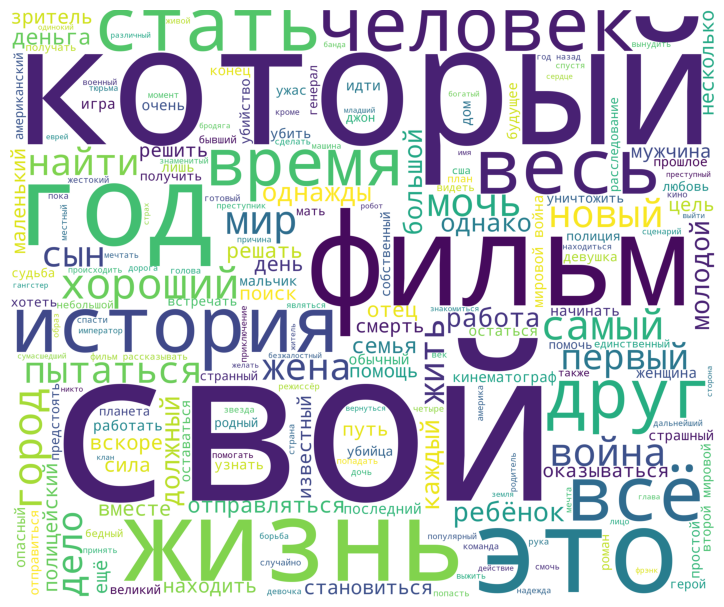

In [46]:
corpus = get_corpus(df['tokenize_text'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)
plt.show()

In [47]:
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

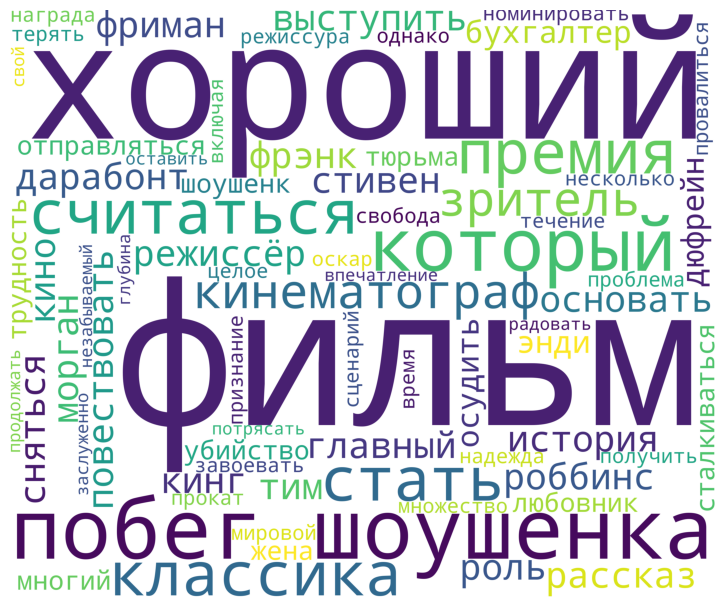

In [48]:
corpus = df['tokenize_text'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)
plt.show()

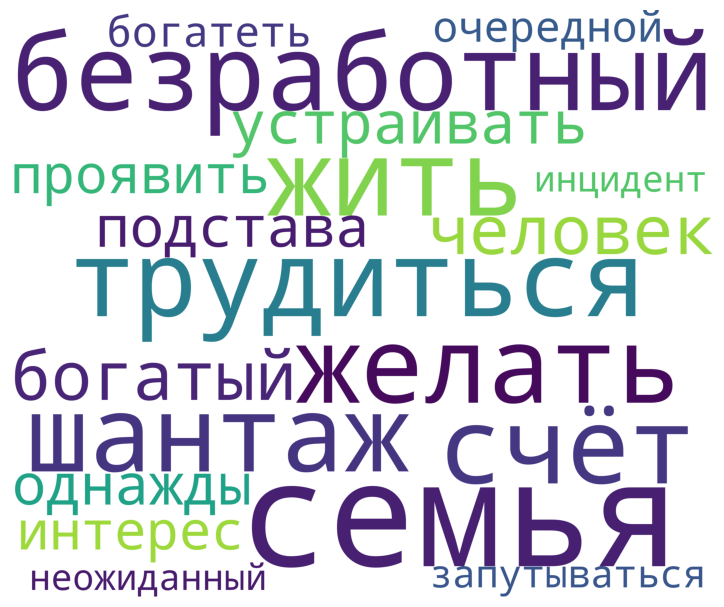

In [49]:
corpus = df['tokenize_text'][32]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)
plt.show()

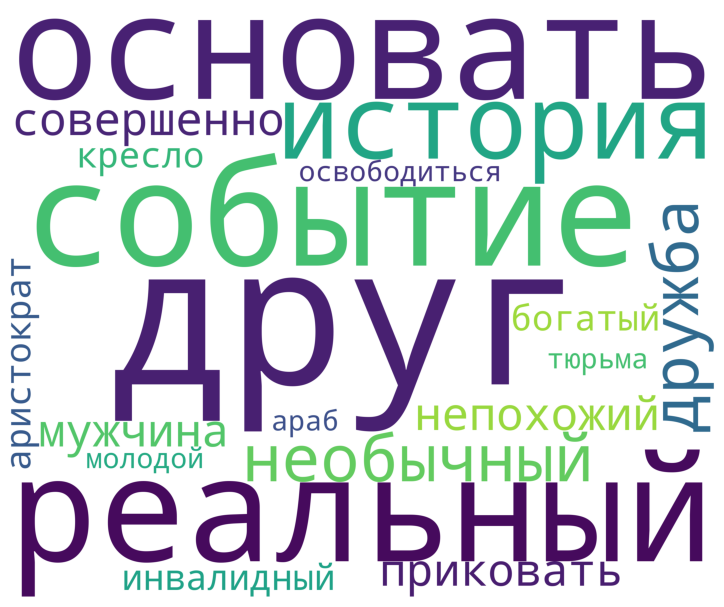

In [50]:
corpus = df['tokenize_text'][47]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)
plt.show()

Вывели облако слов несколько раз для разных записей и посмотрели какие слова чаще всего встречаются в них.

## Векторизация текстовых данных

### Bag of words

In [51]:
vectorizer = CountVectorizer()
count_matrix1 = vectorizer.fit(df['tokenize_text'])

In [52]:
len(vectorizer.vocabulary_)

3601

In [53]:
print(vectorizer.vocabulary_)

{'побег': 2096, 'шоушенка': 3529, 'фильм': 3341, 'который': 1292, 'считаться': 3081, 'хороший': 3419, 'история': 1132, 'кино': 1198, 'режиссёр': 2652, 'выступить': 564, 'фрэнк': 3378, 'дарабонт': 698, 'главный': 617, 'роль': 2708, 'сняться': 2901, 'тим': 3138, 'роббинс': 2691, 'морган': 1546, 'фриман': 3374, 'основать': 1932, 'рассказ': 2624, 'стивен': 3016, 'кинг': 1194, 'повествовать': 2107, 'бухгалтер': 309, 'энди': 3566, 'дюфрейн': 874, 'осудить': 1948, 'убийство': 3215, 'жена': 905, 'любовник': 1421, 'отправляться': 1981, 'тюрьма': 3203, 'шоушенк': 3528, 'сталкиваться': 2999, 'многий': 1528, 'трудность': 3181, 'проблема': 2444, 'терять': 3132, 'надежда': 1595, 'свобода': 2764, 'провалиться': 2446, 'мировой': 1517, 'прокат': 2481, 'номинировать': 1790, 'несколько': 1756, 'премия': 2353, 'оскар': 1926, 'включая': 394, 'режиссура': 2651, 'сценарий': 3076, 'получить': 2203, 'однако': 1869, 'течение': 3136, 'время': 492, 'стать': 3009, 'классика': 1214, 'кинематограф': 1195, 'завоевать

In [54]:
russian_stopwords = list(russian_stopwords)

In [55]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['tokenize_text'])

Преобразовали текста в числовые векторы

In [56]:
count_matrix.shape

(249, 1454)

In [57]:
print(count_matrix)

  (0, 821)	4
  (0, 1353)	6
  (0, 488)	3
  (0, 1257)	2
  (0, 1386)	4
  (0, 423)	1
  (0, 448)	1
  (0, 1048)	1
  (0, 1378)	1
  (0, 212)	1
  (0, 1069)	1
  (0, 1168)	1
  (0, 751)	1
  (0, 1029)	1
  (0, 1224)	1
  (0, 446)	1
  (0, 1436)	1
  (0, 761)	1
  (0, 1300)	1
  (0, 331)	1
  (0, 539)	1
  (0, 776)	1
  (0, 1294)	1
  (0, 1210)	1
  (0, 588)	1
  :	:
  (248, 363)	1
  (248, 271)	1
  (248, 696)	1
  (248, 699)	1
  (248, 780)	1
  (248, 1098)	1
  (248, 668)	1
  (248, 1071)	1
  (248, 1180)	1
  (248, 270)	1
  (248, 493)	1
  (248, 1403)	1
  (248, 857)	1
  (248, 859)	1
  (248, 115)	1
  (248, 1256)	1
  (248, 814)	1
  (248, 1169)	1
  (248, 868)	1
  (248, 1325)	1
  (248, 1429)	1
  (248, 500)	1
  (248, 909)	1
  (248, 960)	2
  (248, 730)	1


In [58]:
vectorizer.get_feature_names_out()[100:200]

array(['вернуться домой', 'верный', 'вершина', 'вести', 'весь',
       'весь время', 'весь мир', 'весь свой', 'весь свой жизнь',
       'весь сила', 'весь сила пытаться', 'весь страна', 'ветеран',
       'взгляд', 'взрыв', 'взять', 'вид', 'видение', 'видеть', 'включая',
       'владелец', 'власть', 'власть мир', 'влияние', 'влиятельный',
       'влюбляться', 'вместе', 'вместо', 'внешность', 'вновь', 'вносить',
       'вовлечь', 'вода', 'вода похожий', 'военнопленный', 'военный',
       'военный драма', 'военный драма рассказывать', 'возвращаться',
       'возвращаться домой', 'возлюбить', 'возможность', 'возраст',
       'возродить', 'война', 'война вьетнам', 'война который',
       'война фильм', 'войско', 'вокруг', 'вольный', 'вопреки', 'вопрос',
       'вор', 'воспоминание', 'восстановить', 'восток', 'впервые', 'враг',
       'вражда', 'врач', 'время', 'время великий',
       'время великий депрессия', 'время второй', 'время второй мировой',
       'вселенная', 'вскоре', 'встретить'

Возвращает список всех уникальных слов, которые были извлечены из текста и включены в словарь в диапазоне слов с индексами от 100 до 199 включительно.

### TF-IDF

In [59]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [60]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tokenize_text'])

CPU times: total: 46.9 ms
Wall time: 43.9 ms


 Преобразовали текста в числовую матрицу с помощью TF-IDF

In [61]:
tfidf_matrix.shape

(249, 684)

In [62]:
print(tfidf_matrix)

  (0, 635)	0.3679694696279636
  (0, 224)	0.12986903133657596
  (0, 585)	0.22192863153356587
  (0, 648)	0.3141810199060123
  (0, 192)	0.05894811408032361
  (0, 203)	0.10336329039089756
  (0, 486)	0.09768600965632164
  (0, 645)	0.10684560810258452
  (0, 92)	0.09530587879865131
  (0, 496)	0.10034676958071577
  (0, 343)	0.09768600965632164
  (0, 473)	0.10684560810258452
  (0, 566)	0.11096431576678294
  (0, 201)	0.1160052065488474
  (0, 350)	0.1160052065488474
  (0, 606)	0.09315278853911695
  (0, 149)	0.0796474418305197
  (0, 360)	0.07854525497650308
  (0, 603)	0.10034676958071577
  (0, 558)	0.1160052065488474
  (0, 444)	0.10684560810258452
  (0, 596)	0.11096431576678294
  (0, 284)	0.10336329039089756
  (0, 508)	0.11096431576678294
  (0, 445)	0.1160052065488474
  :	:
  (248, 515)	0.19746852329208675
  (248, 407)	0.16223333165222717
  (248, 154)	0.10191352206081077
  (248, 530)	0.19746852329208675
  (248, 33)	0.15856825862047666
  (248, 400)	0.15214433389596424
  (248, 164)	0.197468523292086

In [63]:
tfidf_vectorizer.get_feature_names_out()[150:160]

array(['женщина', 'жертва', 'жестокий', 'живой', 'жизнь', 'житель',
       'жить', 'журналист', 'забирать', 'заветный'], dtype=object)

## Тематическое моделирование

In [64]:
import gensim

In [65]:
def tokenize2(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    return tokens

In [66]:
df['tokenize_text2'] = [tokenize2(text) for text in df['tokenize_text']]

In [67]:
df.head()

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text,tokenize_text2
0,Побег из Шоушенка,The Shawshank Redemption,1994,США,драма,142 мин.,9.44,"""Побег из Шоушенка"" - фильм, который считается...",побег из шоушенка фильм который считается одн...,побег из шоушенка фильм который считаться один...,побег шоушенка фильм который считаться хороший...,"[побег, шоушенка, фильм, который, считаться, х..."
1,Крестный отец,The Godfather,1972,США,драма,175 мин.,9.11,"Фильм, ставший классикой своего жанра, рассказ...",фильм ставший классикой своего жанра рассказыв...,фильм стать классика свой жанр рассказывать ис...,фильм стать классика свой жанр рассказывать ис...,"[фильм, стать, классика, свой, жанр, рассказыв..."
2,Темный рыцарь,The Dark Knight,2008,США,боевик,152 мин.,9.12,Бэтман вершит правосудие в Готэме. Его партнер...,бэтман вершит правосудие в готэме его партнера...,бэтман вершить правосудие в готэма он партнёр ...,бэтман вершить правосудие готэма партнёр стано...,"[бэтман, вершить, правосудие, готэма, партнёр,..."
3,Крестный отец 2,The Godfather: Part II,1974,США,драма,202 мин.,8.88,Продолжение эпохальной саги режиссера Френсиса...,продолжение эпохальной саги режиссера френсиса...,продолжение эпохальный сага режиссёр френсиса ...,продолжение эпохальный сага режиссёр френсиса ...,"[продолжение, эпохальный, сага, режиссёр, френ..."
4,12 разгневанных мужчин,12 Angry Men,1957,США,детектив,96 мин.,9.15,Один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжный в дело о убийство пытатьс...,12 присяжный дело убийство пытаться убедить ос...,"[12, присяжный, дело, убийство, пытаться, убед..."


In [68]:
gensim_dictionary = gensim.corpora.Dictionary(df['tokenize_text2'])
gensim_dictionary.filter_extremes(no_above=0.1, no_below=5)
gensim_dictionary.compactify()

In [69]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in df['tokenize_text2']]

In [70]:
corpus

[[(0, 1),
  (1, 1),
  (2, 2),
  (3, 2),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 4)],
 [(22, 1)],
 [(8, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1)],
 [(14, 1),
  (22, 1),
  (26, 2),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1)],
 [(19, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1)],
 [(5, 1), (26, 1), (31, 1), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1)],
 [(47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1)],
 [(57, 1), (58, 1)],
 [(10, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(30, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1)],
 [(80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1)],


Провели тематическое моделирование, проведя токенизацию с удалением стоп- слов, создали словарь, где сформировали уникальный набор слов из текстов и сформировали корпус, где преобразовали тексты в числовой формат.

### Моделирование LDA

In [71]:
lda_20 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=10, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

In [72]:
lda_20.print_topics()

[(0,
  '0.035*"последний" + 0.029*"большой" + 0.021*"вместе" + 0.018*"деньга" + 0.017*"день" + 0.014*"лицо" + 0.014*"ребёнок" + 0.014*"преступный" + 0.014*"знаменитый" + 0.014*"ещё"'),
 (1,
  '0.031*"мужчина" + 0.027*"голова" + 0.026*"бедный" + 0.022*"простой" + 0.021*"дело" + 0.019*"жена" + 0.018*"желать" + 0.018*"начинаться" + 0.018*"совершить" + 0.017*"должный"'),
 (2,
  '0.023*"новый" + 0.023*"узнать" + 0.021*"жена" + 0.020*"город" + 0.018*"известный" + 0.017*"опасный" + 0.015*"жить" + 0.015*"однажды" + 0.015*"отправляться" + 0.015*"вместе"'),
 (3,
  '0.031*"пытаться" + 0.030*"найти" + 0.030*"женщина" + 0.029*"убийство" + 0.023*"полицейский" + 0.021*"дело" + 0.017*"молодой" + 0.016*"день" + 0.016*"роль" + 0.015*"век"'),
 (4,
  '0.033*"реальный" + 0.024*"четыре" + 0.024*"основать" + 0.020*"генерал" + 0.020*"сын" + 0.020*"разный" + 0.020*"молодой" + 0.019*"произойти" + 0.018*"мир" + 0.018*"решить"'),
 (5,
  '0.042*"самый" + 0.026*"город" + 0.023*"каждый" + 0.020*"полицейский" + 0.020

Просмотрели какие слова являются характерными для тем вместе с их значимостью (весом, чем он больше тем более занчимым является слово)

In [73]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

vis_data = gensimvis.prepare(lda_20, corpus, gensim_dictionary)
pyLDAvis.display(vis_data)

In [74]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [75]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_20,
                                     texts=df["tokenize_text2"],
                                     dictionary=gensim_dictionary,
                                     coherence="c_v")
coherence_lda = coherence_model_lda.get_coherence()

print("\nCoherence Score: ", coherence_lda)


Coherence Score:  0.408997439687717


Вычислили метрику когерентности (Coherence Score) для тематической модели LDA, чтобы оценить её качество.

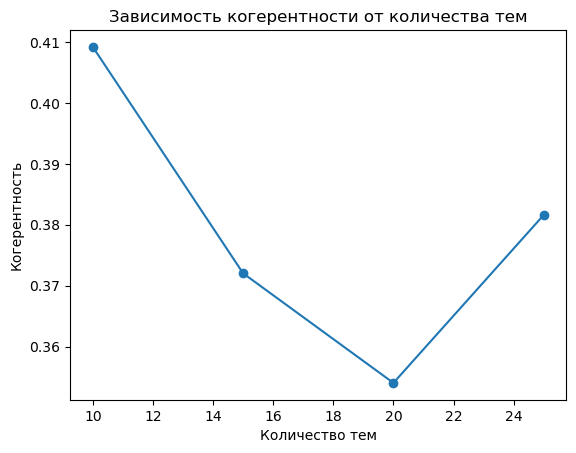

In [76]:
coherence_values = []
for num_topics in range(10, 30, 5):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                             num_topics=num_topics,
                             id2word=gensim_dictionary,
                             passes=10,
                             random_state=6457)
    
    coherence_model = CoherenceModel(model=lda_model,
                                     texts=df["tokenize_text2"],
                                     dictionary=gensim_dictionary,
                                     coherence="c_v")
    
    coherence_values.append(coherence_model.get_coherence())

import matplotlib.pyplot as plt

plt.plot(range(10, 30, 5), coherence_values, marker='o')
plt.xlabel("Количество тем")
plt.ylabel("Когерентность")
plt.title("Зависимость когерентности от количества тем")
plt.show()

Наивысшая когерентность (~0.41) наблюдается при 10 темах.

Лучше использовать 10–12 тем, так как в этом диапазоне когерентность ещё остаётся достаточно высокой.

In [77]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [78]:
vis_20 = gensimvis.prepare(lda_20, corpus, gensim_dictionary)

In [79]:
pyLDAvis.enable_notebook()

In [80]:
vis_20

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.020654 -0.053491       1        1  13.019387
5     -0.012496 -0.090228       2        1  12.905046
7      0.019924 -0.031544       3        1  11.574075
8      0.047207 -0.028679       4        1  10.660014
0      0.007975  0.014035       5        1  10.433694
3      0.087591 -0.115949       6        1   9.650563
9     -0.183124 -0.037354       7        1   9.619754
1      0.101335  0.081620       8        1   8.245286
4      0.069743  0.135759       9        1   7.637309
6     -0.117502  0.125831      10        1   6.254871, topic_info=             Term       Freq      Total Category  logprob  loglift
164         самый  25.000000  25.000000  Default  30.0000  30.0000
91        обычный  11.000000  11.000000  Default  29.0000  29.0000
53      последний  11.000000  11.000000  Default  28.0000  28.0000
2         зритель  13.000000  13.000000  Default  27.0000  27.0000
5         мировой  18.000000  18.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
157         убить   1.833400  10.761293  Topic10  -4.4230   1.0020
10   отправляться   3.128717  19.901432  Topic10  -3.8885   0.9216
132          игра   1.833402  11.723365  Topic10  -4.4230   0.9164
165        смерть   1.833410  12.572731  Topic10  -4.4230   0.8465
1            жена   1.622319  20.815465  Topic10  -4.5453   0.2200

[430 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
239       3  0.139320         «
239       5  0.139320         «
239       7  0.139320         «
239       8  0.278639         «
239       9  0.139320         «
...     ...       ...       ...
226       5  0.137826  являться
226       7  0.275653  являться
226       8  0.137826  являться
129       2  0.552858    япония
129       3  0.368572    япония

[1085 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 8, 9, 1, 4, 10, 2, 5, 7])

In [81]:
from sklearn.decomposition import LatentDirichletAllocation

In [82]:
lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
lda_model.fit(count_matrix)

for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}: {', '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: который, это, стать, свой, год, мочь, жизнь, большой, мальчик, всё
Topic 1: фильм, история, хороший, который, стать, год, кинематограф, друг, свой, самый
Topic 2: который, стать, война, фильм, история, свой, ужас, рассказывать, деньга, простой
Topic 3: который, жизнь, свой, фильм, весь, война, история, стать, всё, это
Topic 4: свой, город, человек, который, это, последний, полицейский, весь, убийство, конец
Topic 5: который, свой, война, жизнь, мочь, это, город, оказываться, друг, обычный
Topic 6: свой, год, который, это, человек, друг, весь, время, история, очень
Topic 7: свой, человек, который, новый, дело, это, жизнь, фильм, найти, всё
Topic 8: свой, который, год, каждый, люк, жизнь, друг, смерть, отправиться, век
Topic 9: который, свой, история, война, всё, мировой война, мировой, пытаться, год, второй мировой война


На основе матрицы count_matrix, вывели топ-10 ключевых слов для каждой из 10 тем.

In [83]:
lda_model = LatentDirichletAllocation(learning_method='online', random_state=5, n_jobs=-1, n_components=11)
lda_model.fit(count_matrix)

LatentDirichletAllocation(learning_method='online', n_components=11, n_jobs=-1,
                          random_state=5)

In [84]:
topic_keywords = pd.DataFrame()
for i,topic in enumerate(lda_model.components_):
    topic_keywords[f'Topic {i + 1}'] = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-50:]]
topic_keywords

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11
0,ночь,трое,исторический,решать найти,сражение,большой,объединять,брат,дочь решать,однако,реликвия
1,жажда,начальство,жанр,непростой,опасный,конец,мастер,мать,это дело,цель,джонс
2,родный город,время второй мировой,премия,крайне,противостоять,соглашаться,ещё,сестра,детектив,полицейский,верный
3,очистить,время второй,оставаться,выбор,злой,путь,путь,свой,отправиться,полиция,индиана джонс
4,должный найти,покончить,сценарий,отправляться поиск,чара,это,свой дело,странный,поиск,собственный,звезда смерть
5,повзрослеть,гибель,мир,маршал,богатый,джон,ньюйорк,меняться,мочь,смерть,образ
6,зависеть,положение,история кино,лицо,оккупировать,свой,королевство,провинциальный,золото,известный,соло
7,шрам,музыкант,хороший фильм,американский,мужчина,вместо,год,токио,потерять,вместе,индиана
8,антонио,нанимать,гражданский война,открыть,финальный,правило,искусный,америка,де,обычный,подружиться
9,отель,остаться,фильм хороший,единственный,друг друг,работа,моралесь,помогать,конец,девочка,являться


Создали DataFrame с ключевыми словами для каждой темы, найденной моделью LDA, где берутся 50 наименее вероятных слов для каждой темы.

### Mодель NMF

In [85]:
from sklearn.decomposition import NMF

In [86]:
nmf_model = NMF(n_components=10, random_state=0)
nmf_model.fit(tfidf_matrix)
for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: ребёнок, жить, мать, пара, небольшой, год, джек, комната, мальчик, странный
Topic 1: фильм, который, хороший, история, зритель, самый, кинематограф, стать, год, кино
Topic 2: война, мировой война, мировой, второй мировой, второй мировой война, второй, еврей, время второй мировой, время второй, американский
Topic 3: дело, убийство, который, женщина, расследование, полицейский, решать, расследовать, местный, убийца
Topic 4: друг, люк, отправиться, планета, новый, друг друг, повстанец, приключение, молодой, который
Topic 5: свой, мужчина, совершить, брат, всё, жена, пытаться, влюбляться, пока, младший
Topic 6: реальный, история, год, реальный история, рассказывать, фильм рассказывать, рассказывать реальный, рассказывать реальный история, фильм рассказывать реальный, фильм
Topic 7: жизнь, весь, работа, стать, депрессия, помогать, работать, отношение, который, страна
Topic 8: поиск, человек, отправляться, найти, кольцо, уничтожить, отправляться поиск, саурон, королевство, битва
Top

C:\anaconda\Lib\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Вывели 10 тем с топ-10 слов для каждой темы модели NMF

In [87]:
nmf_model = NMF(n_components=5, random_state=0)
nmf_model.fit(tfidf_matrix)
for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: жизнь, свой, ребёнок, стать, работа, весь, сын, жена, семья, деньга
Topic 1: фильм, история, год, который, рассказывать, хороший, реальный, фильм рассказывать, стать, зритель
Topic 2: война, мировой война, мировой, второй мировой война, второй мировой, второй, еврей, время второй мировой, время второй, американский
Topic 3: дело, убийство, который, полицейский, женщина, расследование, решать, всё, местный, расследовать
Topic 4: друг, город, человек, который, свой, поиск, новый, это, день, всё


### Модель LSA

In [88]:
from sklearn.decomposition import TruncatedSVD

In [89]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, random_state=0)
lsa_model.fit(tfidf_matrix)

for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: свой, который, фильм, жизнь, год, это, история, человек, стать, всё
Topic 1: фильм, история, рассказывать, год, фильм рассказывать, реальный, мировой, реальный история, хороший, зритель
Topic 2: война, мировой война, мировой, второй мировой война, второй мировой, второй, еврей, время второй, время второй мировой, ужас
Topic 3: жизнь, ребёнок, стать, свой, работать, год, весь, работа, свой жизнь, депрессия
Topic 4: друг, год, город, человек, история, игрушка, молодой, поиск, день, большой
Topic 5: год, свой, история, мужчина, пытаться, реальный, всё, убийство, суд, семья
Topic 6: свой, друг, фильм, поиск, отправляться, первый, мужчина, желать, найти, время
Topic 7: жизнь, реальный, событие, основать реальный, основать, америка, великий, депрессия, день, первый
Topic 8: человек, найти, история, поиск, работать, уничтожить, отправляться, стать, мечта, кольцо
Topic 9: друг, самый, жена, жизнь, несколько, свой, обычный, пока, человек, профессор


Вывели 10 тем  с топ-10 слов для каждой темы модели LSA

In [90]:
lsa_model = TruncatedSVD(n_components=5, random_state=0)
lsa_model.fit(tfidf_matrix)

for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: свой, который, фильм, жизнь, год, это, история, человек, стать, весь
Topic 1: фильм, история, рассказывать, фильм рассказывать, год, реальный, мировой, реальный история, хороший, рассказывать реальный история
Topic 2: война, мировой война, мировой, второй мировой, второй мировой война, второй, еврей, время второй, время второй мировой, ужас
Topic 3: жизнь, свой, ребёнок, стать, год, свой жизнь, депрессия, семья, работать, мать
Topic 4: год, друг, реальный, основать реальный, город, история, реальный событие, основать реальный событие, однажды, день


## Кластеризация

In [91]:
df.head(25)

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text,tokenize_text2
0,Побег из Шоушенка,The Shawshank Redemption,1994,США,драма,142 мин.,9.44,"""Побег из Шоушенка"" - фильм, который считается...",побег из шоушенка фильм который считается одн...,побег из шоушенка фильм который считаться один...,побег шоушенка фильм который считаться хороший...,"[побег, шоушенка, фильм, который, считаться, х..."
1,Крестный отец,The Godfather,1972,США,драма,175 мин.,9.11,"Фильм, ставший классикой своего жанра, рассказ...",фильм ставший классикой своего жанра рассказыв...,фильм стать классика свой жанр рассказывать ис...,фильм стать классика свой жанр рассказывать ис...,"[фильм, стать, классика, свой, жанр, рассказыв..."
2,Темный рыцарь,The Dark Knight,2008,США,боевик,152 мин.,9.12,Бэтман вершит правосудие в Готэме. Его партнер...,бэтман вершит правосудие в готэме его партнера...,бэтман вершить правосудие в готэма он партнёр ...,бэтман вершить правосудие готэма партнёр стано...,"[бэтман, вершить, правосудие, готэма, партнёр,..."
3,Крестный отец 2,The Godfather: Part II,1974,США,драма,202 мин.,8.88,Продолжение эпохальной саги режиссера Френсиса...,продолжение эпохальной саги режиссера френсиса...,продолжение эпохальный сага режиссёр френсиса ...,продолжение эпохальный сага режиссёр френсиса ...,"[продолжение, эпохальный, сага, режиссёр, френ..."
4,12 разгневанных мужчин,12 Angry Men,1957,США,детектив,96 мин.,9.15,Один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжный в дело о убийство пытатьс...,12 присяжный дело убийство пытаться убедить ос...,"[12, присяжный, дело, убийство, пытаться, убед..."
5,Список Шиндлера,Schindler`s List,1993,США,биографический,195 мин.,9.19,Немецкий фабрикант и член нацистской партии Ос...,немецкий фабрикант и член нацистской партии ос...,немецкий фабрикант и член нацистский партия ос...,немецкий фабрикант член нацистский партия оска...,"[немецкий, фабрикант, член, нацистский, партия..."
6,Властелин колец 3: Возвращение Короля,The Lord of the Rings: The Return of the King,2003,"США, Новая Зеландия",боевик,201 мин.,9.48,Близится последняя битва за Средиземье. На пут...,близится последняя битва за средиземье на пути...,близиться последний битва за средиземье на пут...,близиться последний битва средиземье путь войс...,"[близиться, последний, битва, средиземье, путь..."
7,Криминальное чтиво,Pulp Fiction,1994,США,драма,154 мин.,8.94,Три истории из жизни двух бандитов - Винсента ...,три истории из жизни двух бандитов винсента в...,три история из жизнь два бандит винсент вега и...,история жизнь бандит винсент вега джулс винфил...,"[история, жизнь, бандит, винсент, вега, джулс,..."
8,Властелин колец: Братство кольца,The Lord of the Rings: The Fellowship of the Ring,2001,"США, Новая Зеландия",боевик,178 мин.,9.33,Поиски великого кольца Саурона завершены. Оно ...,поиски великого кольца саурона завершены оно п...,поиск великий кольцо саурон завершить оно попа...,поиск великий кольцо саурон завершить оно попа...,"[поиск, великий, кольцо, саурон, завершить, он..."
9,"Хороший, плохой, злой","The Good, the Bad and the Ugly",1966,"Италия, Испания, Германия (ФРГ), США",боевик,161 мин.,8.96,Действие происходит в разгар гражданской войны...,действие происходит в разгар гражданской войны...,действие происходить в разгар гражданский войн...,действие происходить разгар гражданский война ...,"[действие, происходить, разгар, гражданский, в..."


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title_russia    249 non-null    object 
 1   title_english   247 non-null    object 
 2   date            249 non-null    int64  
 3   country         249 non-null    object 
 4   genre           249 non-null    object 
 5   duration        203 non-null    object 
 6   rating          249 non-null    float64
 7   description     249 non-null    object 
 8   prep_text       249 non-null    object 
 9   text_lemm       249 non-null    object 
 10  tokenize_text   249 non-null    object 
 11  tokenize_text2  249 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 23.5+ KB


In [93]:
df['duration'].value_counts()

duration
130 мин.    8
122 мин.    5
132 мин.    5
131 мин.    5
129 мин.    5
           ..
228 мин.    1
207 мин.    1
139 мин.    1
68 мин.     1
156 мин.    1
Name: count, Length: 93, dtype: int64

In [94]:
df['duration'] = df['duration'].str.replace(' мин.', '', regex=False)
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
mean_duration = df['duration'].mean()
df['duration'] = df['duration'].fillna(mean_duration)
print(df['duration'].value_counts(dropna=False))

duration
131.950739    46
130.000000     8
129.000000     5
122.000000     5
132.000000     5
              ..
228.000000     1
207.000000     1
139.000000     1
68.000000      1
156.000000     1
Name: count, Length: 94, dtype: int64


In [95]:
df['date'].value_counts()

date
1995    8
2004    7
1957    6
2009    6
2003    6
       ..
1927    1
1941    1
1944    1
1958    1
1934    1
Name: count, Length: 87, dtype: int64

In [96]:
df['date'] = pd.to_numeric(df['date'], errors='coerce')
df['date'].value_counts()

date
1995    8
2004    7
1957    6
2009    6
2003    6
       ..
1927    1
1941    1
1944    1
1958    1
1934    1
Name: count, Length: 87, dtype: int64

In [97]:
df['rating'].value_counts()

rating
8.50    8
8.00    7
9.00    7
8.48    6
8.80    6
       ..
8.49    1
8.86    1
8.65    1
8.14    1
7.33    1
Name: count, Length: 116, dtype: int64

In [98]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
mean_rating = df['rating'].mean()
df['rating'] = df['rating'].fillna(mean_rating)
df['rating'].value_counts()

rating
8.50    8
8.00    7
9.00    7
8.48    6
8.80    6
       ..
8.49    1
8.86    1
8.65    1
8.14    1
7.33    1
Name: count, Length: 116, dtype: int64

In [99]:
df['genre'].value_counts()

genre
драма             83
боевик            56
детектив          27
биографический    27
военный           16
комедия           12
детский            8
аниме              6
вестерн            5
криминал           4
триллер            2
мистика            1
мелодрама          1
приключения        1
Name: count, dtype: int64

In [100]:
from sklearn.cluster import KMeans

In [101]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['genre_number'] = label_encoder.fit_transform(df['genre'])

In [102]:
df['genre_number'].value_counts()

genre_number
7     83
2     56
5     27
1     27
4     16
8     12
6      8
0      6
3      5
9      4
13     2
11     1
10     1
12     1
Name: count, dtype: int64

In [103]:
df['rating'] = df['rating'].astype(float)
df['duration'] = df['duration'].astype(float)
df['date'] = df['date'].astype(float)

Преобразовали поля rating, duration, date в float

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title_russia    249 non-null    object 
 1   title_english   247 non-null    object 
 2   date            249 non-null    float64
 3   country         249 non-null    object 
 4   genre           249 non-null    object 
 5   duration        249 non-null    float64
 6   rating          249 non-null    float64
 7   description     249 non-null    object 
 8   prep_text       249 non-null    object 
 9   text_lemm       249 non-null    object 
 10  tokenize_text   249 non-null    object 
 11  tokenize_text2  249 non-null    object 
 12  genre_number    249 non-null    int32  
dtypes: float64(3), int32(1), object(9)
memory usage: 24.4+ KB


In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
X = df.loc[:, ['date', 'duration', 'rating', 'genre_number']].values

In [107]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(X)
data_normalized = pd.DataFrame(data_normalized, columns=['date', 'duration', 'rating', 'genre_number'])

print("\nДанные после работы нормализации:")
print(data_normalized)


Данные после работы нормализации:
         date  duration  rating  genre_number
0    0.708738  0.435294  0.8600      0.538462
1    0.495146  0.629412  0.7775      0.538462
2    0.844660  0.494118  0.7800      0.153846
3    0.514563  0.788235  0.7200      0.538462
4    0.349515  0.164706  0.7875      0.384615
..        ...       ...     ...           ...
244  0.446602  0.347059  0.5000      0.538462
245  0.126214  0.217647  0.6500      0.615385
246  0.611650  0.452941  0.3325      0.538462
247  0.689320  0.129412  0.6650      0.615385
248  0.689320  0.517647  0.6475      0.538462

[249 rows x 4 columns]


Провели нормализацию данных, преобразуя результат обратно в DataFrame для удобства

In [108]:
print(df[['date', 'duration', 'rating', 'genre_number']].isnull().sum())
print(df[['date', 'duration', 'rating', 'genre_number']].dtypes)

date            0
duration        0
rating          0
genre_number    0
dtype: int64
date            float64
duration        float64
rating          float64
genre_number      int32
dtype: object


In [109]:
X = tfidf_matrix

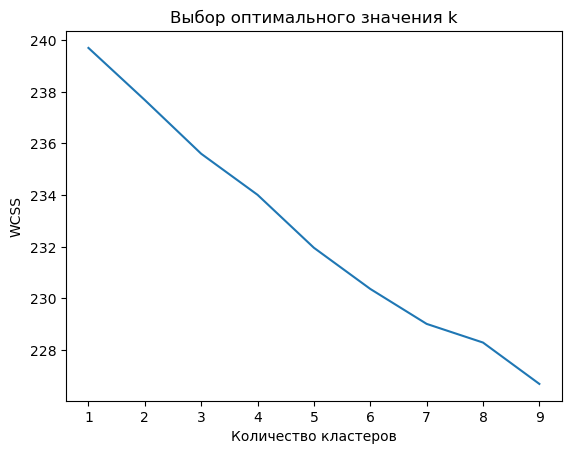

In [110]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Выбор оптимального значения k')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

Из графика, выбор оптимального значения,  можно выделить 7 кластеров

In [111]:
num_clusters = 7
km = KMeans(n_clusters=num_clusters)

In [112]:
%%time
km.fit(X)

CPU times: total: 0 ns
Wall time: 8.49 ms


KMeans(n_clusters=7)

In [113]:
pred=kmeans.fit_predict(X)
clusters = km.labels_.tolist()

In [114]:
clusters[:10]

[2, 0, 1, 3, 2, 6, 0, 1, 3, 3]

In [115]:
cluster_kmeans = km.labels_.tolist()
df['cluster'] = cluster_kmeans
df['cluster'].value_counts()

cluster
3    46
4    43
1    40
2    39
0    36
5    24
6    21
Name: count, dtype: int64

Вывели посмотреть как распределились записи на каждый кластер, приблизительно везде получилось равномерное распределение

In [116]:
df[df['cluster']==0]

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text,tokenize_text2,genre_number,cluster
1,Крестный отец,The Godfather,1972.0,США,драма,175.000000,9.11,"Фильм, ставший классикой своего жанра, рассказ...",фильм ставший классикой своего жанра рассказыв...,фильм стать классика свой жанр рассказывать ис...,фильм стать классика свой жанр рассказывать ис...,"[фильм, стать, классика, свой, жанр, рассказыв...",7,0
6,Властелин колец 3: Возвращение Короля,The Lord of the Rings: The Return of the King,2003.0,"США, Новая Зеландия",боевик,201.000000,9.48,Близится последняя битва за Средиземье. На пут...,близится последняя битва за средиземье на пути...,близиться последний битва за средиземье на пут...,близиться последний битва средиземье путь войс...,"[близиться, последний, битва, средиземье, путь...",2,0
10,Форрест Гамп,Forrest Gump,1994.0,США,драма,142.000000,9.40,Форресту Гампу - умственно отсталому человеку ...,форресту гампу умственно отсталому человеку с...,форрест гампа умственно отсталый человек с доб...,форрест гампа умственно отсталый человек добры...,"[форрест, гампа, умственно, отсталый, человек,...",7,0
17,Пролетая над гнездом кукушки,One Flew Over the Cuckoo`s Nest,1975.0,США,драма,133.000000,9.08,Один бродяга решил отдохнуть за государственны...,один бродяга решил отдохнуть за государственны...,один бродяга решить отдохнуть за государственн...,бродяга решить отдохнуть государственный счёт ...,"[бродяга, решить, отдохнуть, государственный, ...",7,0
20,Эта замечательная жизнь,It`s a Wonderful Life,1946.0,США,драма,130.000000,8.35,Ангел помогает положительному во всех отношени...,ангел помогает положительному во всех отношени...,ангел помогать положительный в весь отношение ...,ангел помогать положительный весь отношение би...,"[ангел, помогать, положительный, весь, отношен...",7,0
24,Город Бога,Cidade de Deus,2002.0,"Франция, Бразилия",драма,130.000000,8.41,Город Бога - нищий квартал Рио-де-Жанейро. Луч...,город бога нищий квартал риодежанейро лучше т...,город бог нищий квартал риодежанейро хороший т...,город бог нищий квартал риодежанейро хороший п...,"[город, бог, нищий, квартал, риодежанейро, хор...",7,0
34,Гладиатор,Gladiator,2000.0,"США, Великобритания",боевик,155.000000,9.09,Великий генерал Максимус должен был стать насл...,великий генерал максимус должен был стать насл...,великий генерал максимус должный быть стать на...,великий генерал максимус должный стать наследн...,"[великий, генерал, максимус, должный, стать, н...",2,0
38,Одержимость,Whiplash,2014.0,США,драма,106.000000,8.78,"История о молодом музыканте, преодолевающем ра...",история о молодом музыканте преодолевающем раз...,история о молодой музыкант преодолевать различ...,история молодой музыкант преодолевать различны...,"[история, молодой, музыкант, преодолевать, раз...",7,0
39,Американская история Х,American History X,1998.0,США,драма,119.000000,8.58,"Дерек Виньярд вернулся из тюрьмы, чтобы найти ...",дерек виньярд вернулся из тюрьмы чтобы найти с...,дерек виньярд вернуться из тюрьма чтобы найти ...,дерек виньярд вернуться тюрьма найти свой млад...,"[дерек, виньярд, вернуться, тюрьма, найти, сво...",7,0
42,Престиж,The Prestige,2006.0,"США, Великобритания",детектив,130.000000,8.79,В этой вольной экранизации романа Кристофера П...,в этой вольной экранизации романа кристофера п...,в этот вольный экранизация роман кристофер при...,вольный экранизация роман кристофер пристый ре...,"[вольный, экранизация, роман, кристофер, прист...",5,0


In [117]:
df[df['cluster']==1]

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text,tokenize_text2,genre_number,cluster
2,Темный рыцарь,The Dark Knight,2008.0,США,боевик,152.000000,9.12,Бэтман вершит правосудие в Готэме. Его партнер...,бэтман вершит правосудие в готэме его партнера...,бэтман вершить правосудие в готэма он партнёр ...,бэтман вершить правосудие готэма партнёр стано...,"[бэтман, вершить, правосудие, готэма, партнёр,...",2,1
7,Криминальное чтиво,Pulp Fiction,1994.0,США,драма,154.000000,8.94,Три истории из жизни двух бандитов - Винсента ...,три истории из жизни двух бандитов винсента в...,три история из жизнь два бандит винсент вега и...,история жизнь бандит винсент вега джулс винфил...,"[история, жизнь, бандит, винсент, вега, джулс,...",7,1
12,Бойцовский клуб,Fight Club,1999.0,"Германия, США",драма,139.000000,8.90,"Обычный клерк, угнетенный своей обыденной жизн...",обычный клерк угнетенный своей обыденной жизнь...,обычный клерк угнести свой обыденный жизнь и т...,обычный клерк угнести свой обыденный жизнь тор...,"[обычный, клерк, угнести, свой, обыденный, жиз...",7,1
19,Семь,Se7en,1995.0,CША,детектив,127.000000,8.88,Двое полицейских расследуют дело серийного уби...,двое полицейских расследуют дело серийного уби...,двое полицейский расследовать дело серийный уб...,двое полицейский расследовать дело серийный уб...,"[двое, полицейский, расследовать, дело, серийн...",5,1
22,Молчание ягнят,The Silence of the Lambs,1991.0,США,детектив,118.000000,9.08,"Клариссе Стерлинг, молодому агенту ФБР, поруче...",клариссе стерлинг молодому агенту фбр поручено...,кларисса стерлинг молодой агент фбр поручить р...,кларисса стерлинг молодой агент фбр поручить р...,"[кларисса, стерлинг, молодой, агент, фбр, пору...",5,1
40,Леон,Léon,1994.0,Франция,боевик,110.000000,8.95,Леон - профессиональный убийца. Он с легкостью...,леон профессиональный убийца он с легкостью в...,леон профессиональный убийца он с лёгкость вып...,леон профессиональный убийца лёгкость выполнят...,"[леон, профессиональный, убийца, лёгкость, вып...",2,1
53,Огни большого города,City Lights,1931.0,США,драма,87.000000,9.00,Маленький бродяга встречает на улице слепую цв...,маленький бродяга встречает на улице слепую цв...,маленький бродяга встречать на улица слепой цв...,маленький бродяга встречать улица слепой цвето...,"[маленький, бродяга, встречать, улица, слепой,...",7,1
54,Джанго освобожденный,Django Unchained,2012.0,США,вестерн,165.000000,8.54,Противник расизма и рабства доктор Кинг Шульц ...,противник расизма и рабства доктор кинг шульц ...,противник расизм и рабство доктор кинг шульц и...,противник расизм рабство доктор кинг шульц осв...,"[противник, расизм, рабство, доктор, кинг, шул...",3,1
56,Помни,Memento,2000.0,США,детектив,113.000000,8.48,Леонард полон решимости отомстить за смерть св...,леонард полон решимости отомстить за смерть св...,леонард полный решимость отомстить за смерть с...,леонард полный решимость отомстить смерть свой...,"[леонард, полный, решимость, отомстить, смерть...",5,1
66,Сияние,The Shining,1980.0,США,мистика,146.000000,8.57,"Джек Торранс, его жена и сын жили в изолирован...",джек торранс его жена и сын жили в изолированн...,джек торранс он жена и сын жить в изолировать ...,джек торранс жена сын жить изолировать отель о...,"[джек, торранс, жена, сын, жить, изолировать, ...",11,1


In [118]:
df[df['cluster']==2]

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text,tokenize_text2,genre_number,cluster
0,Побег из Шоушенка,The Shawshank Redemption,1994.0,США,драма,142.000000,9.44,"""Побег из Шоушенка"" - фильм, который считается...",побег из шоушенка фильм который считается одн...,побег из шоушенка фильм который считаться один...,побег шоушенка фильм который считаться хороший...,"[побег, шоушенка, фильм, который, считаться, х...",7,2
4,12 разгневанных мужчин,12 Angry Men,1957.0,США,детектив,96.000000,9.15,Один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжный в дело о убийство пытатьс...,12 присяжный дело убийство пытаться убедить ос...,"[12, присяжный, дело, убийство, пытаться, убед...",5,2
13,Начало,Inception,2010.0,"США, Великобритания",боевик,148.000000,9.04,"В мире будущего, где существуют технологии, по...",в мире будущего где существуют технологии позв...,в мир будущее где существовать технология позв...,мир будущее существовать технология позволять ...,"[мир, будущее, существовать, технология, позво...",2,2
36,Человек-паук: Паутина вселенных,Spider-Man: Across the Spider-Verse,2023.0,США,боевик,140.000000,8.60,Продолжение истории о подростке из Нью-Йорка М...,продолжение истории о подростке из ньюйорка ма...,продолжение история о подросток из ньюйорк май...,продолжение история подросток ньюйорк майлз мо...,"[продолжение, история, подросток, ньюйорк, май...",2,2
37,Отступники,The Departed,2006.0,США,драма,151.000000,8.80,Полицейские внедряют в окружение мафиози Фрэнк...,полицейские внедряют в окружение мафиози фрэнк...,полицейский внедрять в окружение мафиози фрэнк...,полицейский внедрять окружение мафиози фрэнк к...,"[полицейский, внедрять, окружение, мафиози, фр...",7,2
48,"Новый кинотеатр ""Парадизо""",Cinema Paradiso,1988.0,"Франция, Италия",драма,131.950739,9.13,Известный кинорежиссер впервые за 30 лет решае...,известный кинорежиссер впервые за 30 лет решае...,известный кинорежиссёр впервые за 30 год решат...,известный кинорежиссёр впервые 30 год решаться...,"[известный, кинорежиссёр, впервые, 30, год, ре...",7,2
52,Однажды на Диком Западе,C`era una volta il West,1968.0,"США, Италия",вестерн,175.000000,8.48,Не расстающийся со совей губной гармоникой таи...,не расстающийся со совей губной гармоникой таи...,не расставаться с советь губный гармоника таин...,расставаться советь губный гармоника таинствен...,"[расставаться, советь, губный, гармоника, таин...",3,2
59,12-я неудача,12th Fail,2023.0,Индия,биографический,147.000000,7.00,Фильм рассказывает реальную историю деревенско...,фильм рассказывает реальную историю деревенско...,фильм рассказывать реальный история деревенски...,фильм рассказывать реальный история деревенски...,"[фильм, рассказывать, реальный, история, дерев...",1,2
87,Поющие под дождем,Singin` in the Rain,1952.0,США,комедия,131.950739,8.86,"Фильм ""Поющие под дождем"" - культовый музыкаль...",фильм поющие под дождем культовый музыкальный...,фильм петь под дождь культовый музыкальный фил...,фильм петь дождь культовый музыкальный фильм с...,"[фильм, петь, дождь, культовый, музыкальный, ф...",8,2
109,Схватка,Heat,1995.0,США,боевик,170.000000,8.48,Опытный грабитель банков вступает в дуэль с по...,опытный грабитель банков вступает в дуэль с по...,опытный грабитель банк вступать в дуэль с поли...,опытный грабитель банк вступать дуэль полицейс...,"[опытный, грабитель, банк, вступать, дуэль, по...",2,2


In [119]:
df[df['cluster']==3]

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text,tokenize_text2,genre_number,cluster
3,Крестный отец 2,The Godfather: Part II,1974.0,США,драма,202.000000,8.88,Продолжение эпохальной саги режиссера Френсиса...,продолжение эпохальной саги режиссера френсиса...,продолжение эпохальный сага режиссёр френсиса ...,продолжение эпохальный сага режиссёр френсиса ...,"[продолжение, эпохальный, сага, режиссёр, френ...",7,3
8,Властелин колец: Братство кольца,The Lord of the Rings: The Fellowship of the Ring,2001.0,"США, Новая Зеландия",боевик,178.000000,9.33,Поиски великого кольца Саурона завершены. Оно ...,поиски великого кольца саурона завершены оно п...,поиск великий кольцо саурон завершить оно попа...,поиск великий кольцо саурон завершить оно попа...,"[поиск, великий, кольцо, саурон, завершить, он...",2,3
9,"Хороший, плохой, злой","The Good, the Bad and the Ugly",1966.0,"Италия, Испания, Германия (ФРГ), США",боевик,161.000000,8.96,Действие происходит в разгар гражданской войны...,действие происходит в разгар гражданской войны...,действие происходить в разгар гражданский войн...,действие происходить разгар гражданский война ...,"[действие, происходить, разгар, гражданский, в...",2,3
11,Властелин колец 2: Две крепости,The Lord of the Rings: The Two Towers,2002.0,"США, Новая Зеландия",боевик,179.000000,9.39,Братство кольца распалось. Фродо и Сэм продолж...,братство кольца распалось фродо и сэм продолжа...,братство кольцо распасться фродый и сэм продол...,братство кольцо распасться фродый сэм продолжа...,"[братство, кольцо, распасться, фродый, сэм, пр...",2,3
16,Славные парни,Goodfellas,1990.0,США,биографический,146.000000,8.74,Начинающий молодой гангстер Генри Хилл со свои...,начинающий молодой гангстер генри хилл со свои...,начинающий молодой гангстер генри хилла с свой...,начинающий молодой гангстер генри хилла свой з...,"[начинающий, молодой, гангстер, генри, хилла, ...",1,3
26,Зеленая миля,The Green Mile,1999.0,США,драма,189.000000,9.18,Чернокожий осужденный Джон Коффи (Майкл Кларк ...,чернокожий осужденный джон коффи майкл кларк д...,чернокожий осудить джон коффи майкл кларк дунк...,чернокожий осудить джон коффи майкл кларк дунк...,"[чернокожий, осудить, джон, коффи, майкл, клар...",7,3
27,Терминатор 2: Судный день,Terminator 2: Judgment Day,1991.0,США,боевик,137.000000,9.41,Первая попытка убить Сару Коннор еще до рожден...,первая попытка убить сару коннор еще до рожден...,первый попытка убить сара коннора ещё до рожде...,первый попытка убить сара коннора ещё рождение...,"[первый, попытка, убить, сара, коннора, ещё, р...",2,3
29,Назад в будущее,Back to the Future,1985.0,США,боевик,116.000000,9.15,"Марти был обычным выпускником, пока его ""сумас...",марти был обычным выпускником пока его сумасше...,марти быть обычный выпускник пока он сумасшедш...,марти обычный выпускник пока сумасшедший друг ...,"[марти, обычный, выпускник, пока, сумасшедший,...",2,3
30,Унесенные призраками,Spirited Away,2001.0,Япония,аниме,125.000000,8.77,Маленькая Тихиро вместе с мамой и папой переез...,маленькая тихиро вместе с мамой и папой переез...,маленький тихиро вместе с мама и папа переезжа...,маленький тихиро вместе мама папа переезжать н...,"[маленький, тихиро, вместе, мама, папа, переез...",0,3
35,Король Лев,The Lion King,1994.0,США,детский,89.000000,8.95,"На глаза у малыша Симбы погиб его отец, король...",на глаза у малыша симбы погиб его отец король ...,на глаз у малыш симб погибнуть он отец король ...,глаз малыш симб погибнуть отец король лев муфа...,"[глаз, малыш, симб, погибнуть, отец, король, л...",6,3


In [120]:
df[df['cluster']==4]

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text,tokenize_text2,genre_number,cluster
15,Матрица,The Matrix,1999.0,США,боевик,136.000000,9.20,"Он жил своими серыми буднями, он был очень тал...",он жил своими серыми буднями он был очень тала...,он жить свой серый будни он быть очень талантл...,жить свой серый будни очень талантливый програ...,"[жить, свой, серый, будни, очень, талантливый,...",2,4
21,Семь самураев,Seven Samurai,1954.0,Япония,боевик,207.000000,8.97,"Исторический фильм, действие которого происход...",исторический фильм действие которого происходи...,исторический фильм действие который происходит...,исторический фильм действие который происходит...,"[исторический, фильм, действие, который, проис...",2,4
32,Паразиты,Gisaengchung,2019.0,Корея Южная,драма,132.000000,8.28,Семья безработных не желает трудиться и живут ...,семья безработных не желает трудиться и живут ...,семья безработный не желать трудиться и жить з...,семья безработный желать трудиться жить счёт ш...,"[семья, безработный, желать, трудиться, жить, ...",7,4
33,Психо,Psycho,1960.0,США,детектив,109.000000,8.70,"Мэрион Крейн похищает 40 тысяч долларов, сбега...",мэрион крейн похищает 40 тысяч долларов сбегае...,мэрион крейн похищать 40 тысяча доллар сбегать...,мэрион крейн похищать 40 тысяча доллар сбегать...,"[мэрион, крейн, похищать, 40, тысяча, доллар, ...",5,4
45,Подозрительные лица,The Usual Suspects,1995.0,"Германия, США",детектив,106.000000,8.32,"Полиция, занимаясь расследованием причин взрыв...",полиция занимаясь расследованием причин взрыва...,полиция заниматься расследование причина взрыв...,полиция заниматься расследование причина взрыв...,"[полиция, заниматься, расследование, причина, ...",5,4
61,Сансет бульвар,Sunset Blvd.,1950.0,США,драма,110.000000,8.89,Сценарист по найму пишет сценарий для некогда ...,сценарист по найму пишет сценарий для некогда ...,сценарист по нанять писать сценарий для некогд...,сценарист нанять писать сценарий некогда очень...,"[сценарист, нанять, писать, сценарий, некогда,...",7,4
62,Мстители 3: Война бесконечности,Avengers: Infinity War,2018.0,США,боевик,149.000000,9.04,"Мстители и Стражи Галактики объединяются, чтоб...",мстители и стражи галактики объединяются чтобы...,мститель и стража галактика объединяться чтобы...,мститель стража галактика объединяться противо...,"[мститель, стража, галактика, объединяться, пр...",2,4
65,Свидетель обвинения,Witness for the Prosecution,1957.0,США,детектив,131.950739,8.57,Рассказ Агаты Кристи о полном сюрпризов судеб...,рассказ агаты кристи о полном сюрпризов судеб...,рассказ агат кристи о полный сюрприз судебный ...,рассказ агат кристи полный сюрприз судебный пр...,"[рассказ, агат, кристи, полный, сюрприз, судеб...",5,4
70,Темный рыцарь 2: Возрождение легенды,The Dark Knight Rises,2012.0,"США, Великобритания",боевик,164.000000,8.26,"Бэтмен, восемь лет назад взявший на себе ответ...",бэтмен восемь лет назад взявший на себе ответс...,бэтмена восемь год назад взять на себя ответст...,бэтмена восемь год назад взять ответственность...,"[бэтмена, восемь, год, назад, взять, ответстве...",2,4
71,Тайна Коко,Coco,2017.0,США,детектив,105.000000,8.76,"Раскрытие секрета, не дававшего покоя целым по...",раскрытие секрета не дававшего покоя целым пок...,раскрытие секрет не давать покой целый поколен...,раскрытие секрет давать покой целый поколение ...,"[раскрытие, секрет, давать, покой, целый, поко...",5,4


In [121]:
df[df['cluster']==5]

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text,tokenize_text2,genre_number,cluster
14,Звездные войны: Эпизод 5 - Империя наносит отв...,Star Wars: Episode V - The Empire Strikes Back,1980.0,США,боевик,124.000000,8.98,В Галактике идет война. Имперские войска наход...,в галактике идет война имперские войска находя...,в галактика идти война имперский войско находи...,галактика идти война имперский войско находить...,"[галактика, идти, война, имперский, войско, на...",2,5
18,Интерстеллар,Interstellar,2014.0,США,детектив,169.000000,8.71,Земля изживает себя и человечество должно иска...,земля изживает себя и человечество должно иска...,земля изживать себя и человечество должный иск...,земля изживать человечество должный искать нов...,"[земля, изживать, человечество, должный, искат...",5,5
28,Звездные войны: Эпизод 4 - Новая надежда,Star Wars: Episode IV - A New Hope,1977.0,США,боевик,121.000000,8.92,Принцесса Лейя - предводительница повстанцев з...,принцесса лейя предводительница повстанцев за...,принцесса лейя предводительница повстанец захв...,принцесса лейя предводительница повстанец захв...,"[принцесса, лейя, предводительница, повстанец,...",2,5
50,Чужой,Alien,1979.0,США,триллер,117.000000,8.87,"Команда космического грузовика ""Ностромо"" выхо...",команда космического грузовика ностромо выходи...,команда космический грузовик ностромый выходит...,команда космический грузовик ностромый выходит...,"[команда, космический, грузовик, ностромый, вы...",13,5
57,ВАЛЛ-И,WALL·E,2008.0,США,детский,98.000000,8.87,Далекое будущее. Земля напоминает большую мус...,далекое будущее земля напоминает большую мусо...,далёкий будущее земля напоминать больший мусор...,далёкий будущее земля напоминать больший мусор...,"[далёкий, будущее, земля, напоминать, больший,...",6,5
68,Чужие,Aliens,1986.0,США,боевик,137.000000,9.06,"Спасательную капсулу, с выжившей после схватки...",спасательную капсулу с выжившей после схватки ...,спасательный капсула с выжить после схватка с ...,спасательный капсула выжить схватка чужой элле...,"[спасательный, капсула, выжить, схватка, чужой...",2,5
80,Умница Уилл Хантинг,Good Will Hunting,1997.0,США,драма,126.000000,8.53,Уилл Хантинг вырос в пригороде Бостона. Он поч...,уилл хантинг вырос в пригороде бостона он почт...,уилла хантинг вырасти в пригород бостон он поч...,уилла хантинг вырасти пригород бостон учиться ...,"[уилла, хантинг, вырасти, пригород, бостон, уч...",7,5
83,Твое имя,Kimi no na wa.,2016.0,Япония,аниме,106.000000,8.39,"Мицуха - скромная девушка, живущая в маленьком...",мицуха скромная девушка живущая в маленьком п...,мицуха скромный девушка жить в маленький прови...,мицуха скромный девушка жить маленький провинц...,"[мицуха, скромный, девушка, жить, маленький, п...",0,5
92,Звездные войны: Эпизод 6 - Возвращение Джедая,Star Wars: Episode VI - Return of the Jedi,1983.0,США,боевик,131.000000,8.65,"Дарт Вейдер и Император создают новую ""Звезду ...",дарт вейдер и император создают новую звезду с...,дарт вейдёр и император создавать новый звезда...,дарт вейдёр император создавать новый звезда с...,"[дарт, вейдёр, император, создавать, новый, зв...",2,5
93,Вечное сияние чистого разума,Eternal Sunshine of the Spotless Mind,2004.0,США,драма,108.000000,8.81,"Однажды Джоэл узнает, что его подружка Клемент...",однажды джоэл узнает что его подружка клементи...,однажды джоэл узнать что он подружка клементин...,однажды джоэл узнать подружка клементина решит...,"[однажды, джоэл, узнать, подружка, клементина,...",7,5


In [122]:
df[df['cluster']==6]

,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text,tokenize_text2,genre_number,cluster
5,Список Шиндлера,Schindler`s List,1993.0,США,биографический,195.000000,9.19,Немецкий фабрикант и член нацистской партии Ос...,немецкий фабрикант и член нацистской партии ос...,немецкий фабрикант и член нацистский партия ос...,немецкий фабрикант член нацистский партия оска...,"[немецкий, фабрикант, член, нацистский, партия...",1,6
23,Спасти рядового Райана,Saving Private Ryan,1998.0,США,боевик,169.000000,8.94,Вторая Мировая Война. Одна женщина теряет трои...,вторая мировая война одна женщина теряет троих...,второй мировой война один женщина терять трое ...,второй мировой война женщина терять трое свой ...,"[второй, мировой, война, женщина, терять, трое...",2,6
25,Жизнь прекрасна,La Vita è bella,1997.0,Италия,военный,116.000000,8.91,Вторая мировая война. Италия.Фашисты арестовыв...,вторая мировая война италияфашисты арестовываю...,второй мировой война италияфашист арестовывать...,второй мировой война италияфашист арестовывать...,"[второй, мировой, война, италияфашист, арестов...",4,6
31,Пианист,The Pianist,2002.0,"Германия, Франция, Великобритания, Польша",биографический,150.000000,8.72,"Владислав Шпильман - известный музыкант, всеми...",владислав шпильман известный музыкант всеми с...,владислав шпильман известный музыкант весь сил...,владислав шпильман известный музыкант весь сил...,"[владислав, шпильман, известный, музыкант, вес...",1,6
41,Могила светлячков,Hotaru no haka,1988.0,Япония,аниме,131.950739,8.61,Трагическая история о маленьком мальчике и его...,трагическая история о маленьком мальчике и его...,трагический история о маленький мальчик и он м...,трагический история маленький мальчик младший ...,"[трагический, история, маленький, мальчик, мла...",0,6
44,Дюна: Часть вторая,Dune: Part Two,2024.0,США,боевик,166.000000,7.98,"Герцог Пол Атрейдес присоединяется к фрименам,...",герцог пол атрейдес присоединяется к фрименам ...,герцог пол атрейдес присоединяться к фримя что...,герцог пол атрейдес присоединяться фримя стать...,"[герцог, пол, атрейдес, присоединяться, фримя,...",2,6
46,Касабланка,Casablanca,1942.0,США,драма,102.000000,8.82,Действие происходит во время второй мировой во...,действие происходит во время второй мировой во...,действие происходить в время второй мировой во...,действие происходить время второй мировой войн...,"[действие, происходить, время, второй, мировой...",7,6
55,Апокалипсис сегодня,Apocalypse Now,1979.0,США,военный,153.000000,8.81,Самый разгар войны во Вьетнаме. Капитан Уиллар...,самый разгар войны во вьетнаме капитан уиллард...,самый разгар война в вьетнам капитан уиллард м...,самый разгар война вьетнам капитан уиллард мар...,"[самый, разгар, война, вьетнам, капитан, уилла...",4,6
67,Великий диктатор,The Great Dictator,1940.0,США,военный,131.950739,8.90,"История про простого еврейского цирюльника, пр...",история про простого еврейского цирюльника про...,история про простой еврейский цирюльник прошед...,история простой еврейский цирюльник прошедшее ...,"[история, простой, еврейский, цирюльник, проше...",4,6
69,Бесславные ублюдки,Inglourious Basterds,2009.0,"США, Германия",боевик,153.000000,8.24,Группа евреев американского происхождения веде...,группа евреев американского происхождения веде...,группа еврей американский происхождение вести ...,группа еврей американский происхождение вести ...,"[группа, еврей, американский, происхождение, в...",2,6


Вывели посмотреть каждый кластер с его записями

In [123]:
top_rated_movies = (df[df['cluster'] == 0]
                   .sort_values('rating', ascending=False)
                   .head(5)[['title_russia', 'rating']])
print("\nТоп-5 фильмов с самым высоким рейтингом в кластере 0:")
print(top_rated_movies)
print("\n")
cluster_0_count = len(df[df['cluster'] == 0])
print(f"Количество объектов (фильмов) в кластере 0: {cluster_0_count}")


Топ-5 фильмов с самым высоким рейтингом в кластере 0:
                             title_russia  rating
43                               Харакири    9.67
6   Властелин колец 3: Возвращение Короля    9.48
10                           Форрест Гамп    9.40
1                           Крестный отец    9.11
34                              Гладиатор    9.09


Количество объектов (фильмов) в кластере 0: 36


In [124]:
top_rated_movies = (df[df['cluster'] == 1]
                   .sort_values('rating', ascending=False)
                   .head(5)[['title_russia', 'rating']])
print("\nТоп-5 фильмов с самым высоким рейтингом в кластере 1:")
print(top_rated_movies)
print("\n")
cluster_1_count = len(df[df['cluster'] == 1])
print(f"Количество объектов (фильмов) в кластере 1: {cluster_1_count}")


Топ-5 фильмов с самым высоким рейтингом в кластере 1:
       title_russia  rating
171           Клаус    9.18
2     Темный рыцарь    9.12
22   Молчание ягнят    9.08
79   Храброе сердце    9.07
232    Звуки музыки    9.06


Количество объектов (фильмов) в кластере 1: 40


In [125]:
top_rated_movies = (df[df['cluster'] == 2]
                   .sort_values('rating', ascending=False)
                   .head(5)[['title_russia', 'rating']])
print("\nТоп-5 фильмов с самым высоким рейтингом в кластере 2:")
print(top_rated_movies)
print("\n")
cluster_2_count = len(df[df['cluster'] == 2])
print(f"Количество объектов (фильмов) в кластере 2: {cluster_2_count}")


Топ-5 фильмов с самым высоким рейтингом в кластере 2:
                   title_russia  rating
0             Побег из Шоушенка    9.44
4        12 разгневанных мужчин    9.15
48   Новый кинотеатр "Парадизо"    9.13
13                       Начало    9.04
197             Паровоз Генерал    9.00


Количество объектов (фильмов) в кластере 2: 39


In [126]:
top_rated_movies = (df[df['cluster'] == 3]
                   .sort_values('rating', ascending=False)
                   .head(5)[['title_russia', 'rating']])
print("\nТоп-5 фильмов с самым высоким рейтингом в кластере 3:")
print(top_rated_movies)
print("\n")
cluster_3_count = len(df[df['cluster'] == 3])
print(f"Количество объектов (фильмов) в кластере 3: {cluster_3_count}")


Топ-5 фильмов с самым высоким рейтингом в кластере 3:
                        title_russia  rating
27         Терминатор 2: Судный день    9.41
11   Властелин колец 2: Две крепости    9.39
8   Властелин колец: Братство кольца    9.33
26                      Зеленая миля    9.18
29                   Назад в будущее    9.15


Количество объектов (фильмов) в кластере 3: 46


In [127]:
top_rated_movies = (df[df['cluster'] == 4]
                   .sort_values('rating', ascending=False)
                   .head(5)[['title_russia', 'rating']])
print("\nТоп-5 фильмов с самым высоким рейтингом в кластере 4:")
print(top_rated_movies)
print("\n")
cluster_4_count = len(df[df['cluster'] == 4])
print(f"Количество объектов (фильмов) в кластере 4: {cluster_4_count}")


Топ-5 фильмов с самым высоким рейтингом в кластере 4:
                        title_russia  rating
15                           Матрица    9.20
62   Мстители 3: Война бесконечности    9.04
216                       Терминатор    9.00
239                       День сурка    8.97
21                     Семь самураев    8.97


Количество объектов (фильмов) в кластере 4: 43


In [128]:
top_rated_movies = (df[df['cluster'] == 5]
                   .sort_values('rating', ascending=False)
                   .head(5)[['title_russia', 'rating']])
print("\nТоп-5 фильмов с самым высоким рейтингом в кластере 5:")
print(top_rated_movies)
print("\n")
cluster_5_count = len(df[df['cluster'] == 5])
print(f"Количество объектов (фильмов) в кластере 5: {cluster_5_count}")


Топ-5 фильмов с самым высоким рейтингом в кластере 5:
                                         title_russia  rating
68                                              Чужие    9.06
14  Звездные войны: Эпизод 5 - Империя наносит отв...    8.98
28           Звездные войны: Эпизод 4 - Новая надежда    8.92
50                                              Чужой    8.87
57                                             ВАЛЛ-И    8.87


Количество объектов (фильмов) в кластере 5: 24


In [129]:
top_rated_movies = (df[df['cluster'] == 6]
                   .sort_values('rating', ascending=False)
                   .head(5)[['title_russia', 'rating']])
print("\nТоп-5 фильмов с самым высоким рейтингом в кластере 6:")
print(top_rated_movies)
print("\n")
cluster_6_count = len(df[df['cluster'] == 6])
print(f"Количество объектов (фильмов) в кластере 6: {cluster_6_count}")


Топ-5 фильмов с самым высоким рейтингом в кластере 6:
               title_russia  rating
235        Быть или не быть   10.00
5           Список Шиндлера    9.19
23   Спасти рядового Райана    8.94
25          Жизнь прекрасна    8.91
176             Гран Торино    8.91


Количество объектов (фильмов) в кластере 6: 21


Для каждого кластера вывела топ Топ-5 фильмов с самым высоким рейтингом.

In [130]:
df['cluster'] = cluster_kmeans
cluster_stats = df.groupby('cluster').agg({
    'duration': ['mean', 'median', 'min', 'max'],
    'date': ['mean', 'median', 'min', 'max'],
    'rating': ['mean', 'median', 'min', 'max', 'count']
}).round(2)

print(cluster_stats)

        duration                           date                          \
            mean  median    min    max     mean  median     min     max   
cluster                                                                   
0         128.80  129.50   87.0  201.0  1980.25  1981.0  1936.0  2022.0   
1         127.37  130.98   68.0  182.0  1986.52  1995.5  1921.0  2019.0   
2         136.01  131.95   86.0  238.0  1989.64  1999.0  1926.0  2023.0   
3         133.06  131.95   81.0  229.0  1989.43  1995.5  1925.0  2021.0   
4         130.18  131.95   89.0  207.0  1990.02  1998.0  1928.0  2019.0   
5         127.16  131.00   96.0  169.0  1989.83  1992.5  1927.0  2016.0   
6         145.23  131.95  102.0  228.0  1984.10  1987.0  1940.0  2024.0   

        rating                            
          mean median   min    max count  
cluster                                   
0         8.62   8.57  7.57   9.67    36  
1         8.58   8.56  7.78   9.18    40  
2         8.47   8.52  7.00   9.44

Добавили к DataFrame столбец с метками кластеров и вычислили статистику по каждому кластеру для числовых переменных (duration, date, rating).

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na'

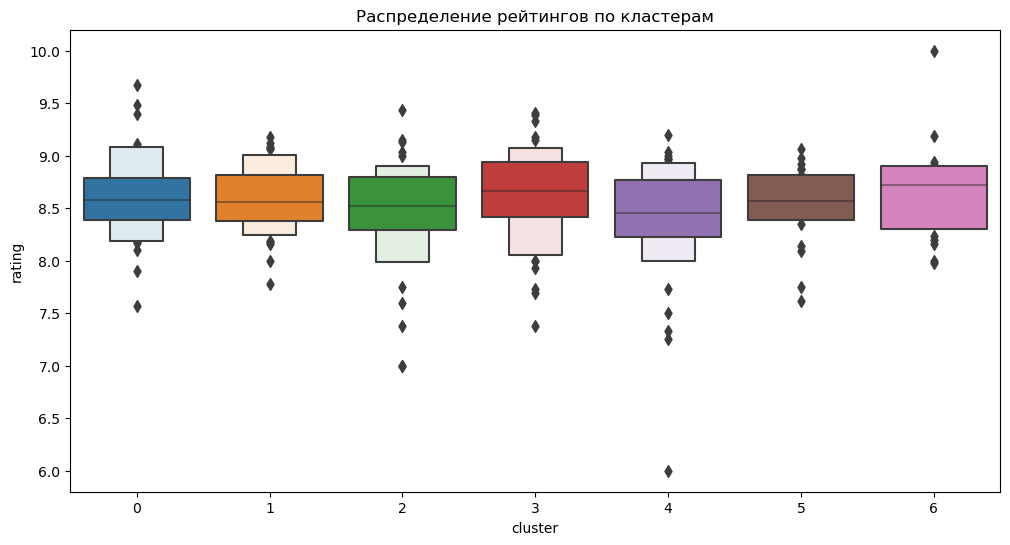

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxenplot(data=df, x='cluster', y='rating')
plt.title('Распределение рейтингов по кластерам')
plt.show()

Посмотрев зависимости, можно сделать вывод что, фильмы жанра: военные драмы (Кластер 6) и глубокие исторические (Кластер 4) получают оценки от зриетелей чуть выше.

In [245]:
def tokenize3(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    return tokens
df.head()


,title_russia,title_english,date,country,genre,duration,rating,description,prep_text,text_lemm,tokenize_text,tokenize_text2,genre_number,cluster
0,Побег из Шоушенка,The Shawshank Redemption,1994.0,США,драма,142.0,9.44,"""Побег из Шоушенка"" - фильм, который считается...",побег из шоушенка фильм который считается одн...,побег из шоушенка фильм который считаться один...,побег шоушенка фильм который считаться хороший...,"[побег, шоушенка, фильм, который, считаться, х...",7,2
1,Крестный отец,The Godfather,1972.0,США,драма,175.0,9.11,"Фильм, ставший классикой своего жанра, рассказ...",фильм ставший классикой своего жанра рассказыв...,фильм стать классика свой жанр рассказывать ис...,фильм стать классика свой жанр рассказывать ис...,"[фильм, стать, классика, свой, жанр, рассказыв...",7,0
2,Темный рыцарь,The Dark Knight,2008.0,США,боевик,152.0,9.12,Бэтман вершит правосудие в Готэме. Его партнер...,бэтман вершит правосудие в готэме его партнера...,бэтман вершить правосудие в готэма он партнёр ...,бэтман вершить правосудие готэма партнёр стано...,"[бэтман, вершить, правосудие, готэма, партнёр,...",2,1
3,Крестный отец 2,The Godfather: Part II,1974.0,США,драма,202.0,8.88,Продолжение эпохальной саги режиссера Френсиса...,продолжение эпохальной саги режиссера френсиса...,продолжение эпохальный сага режиссёр френсиса ...,продолжение эпохальный сага режиссёр френсиса ...,"[продолжение, эпохальный, сага, режиссёр, френ...",7,3
4,12 разгневанных мужчин,12 Angry Men,1957.0,США,детектив,96.0,9.15,Один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжных в деле об убийстве пытае...,один из 12 присяжный в дело о убийство пытатьс...,12 присяжный дело убийство пытаться убедить ос...,"[12, присяжный, дело, убийство, пытаться, убед...",5,2


Метод tokenize3 разбивает текст на токены и удаляет стоп-слова, чтобы оставить только значимые слова.

In [246]:
n_clusters = 7
n_top_words = 10

for cluster_id in range(n_clusters):
    cluster_texts = df[df['cluster'] == cluster_id]['title_russia']
    
    vectorizer = CountVectorizer(max_df=0.95, min_df=1, stop_words=russian_stopwords)
    X = vectorizer.fit_transform(cluster_texts)
    
    lda = LatentDirichletAllocation(n_components=4, random_state=42)  
    lda.fit(X)
    
    feature_names = vectorizer.get_feature_names_out()
    print(f"\nАнализ кластера {cluster_id}  ({len(cluster_texts)} записей):")
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx}: {', '.join(top_words)}")


Анализ кластера 0  (36 записей):
Topic 0: волноваться, доктор, атомную, стрейнджлав, научился, полюбил, бомбу, человек, вселенные, паук
Topic 1: эта, замечательная, жизнь, топ, ган, мэверик, малышка, миллион, тропы, славы
Topic 2: колец, короля, возвращение, властелин, шрамом, лицо, гроздья, гнева, джазе, девушки
Topic 3: кукушки, гнездом, пролетая, американская, история, лезвию, бегущий, бешеный, бык, гамп

Анализ кластера 1  (40 записей):
Topic 0: однажды, случилось, это, ночью, большой, города, огни, большого, музыки, звуки
Topic 1: 12, лет, рабства, шерлок, младший, токийская, повесть, небес, дети, финал
Topic 2: развод, надера, симин, набирайте, случае, убийства, большой, бешеные, псы, темный
Topic 3: освобожденный, джанго, корпорация, монстров, линдон, барри, ягнят, молчание, порту, исчезнувшая

Анализ кластера 2  (39 записей):
Topic 0: человек, убить, паутина, паук, вселенных, ford, ferrari, против, волшебник, оз
Topic 1: 12, стрит, волк, уолл, диком, западе, однажды, кинотеатр

Для каждого из 7 кластеров выявили скрытые темы с помощью LDA.
Показали топ-10 ключевых слов для каждой темы внутри кластера.

### По каждому кластеру можно сделать небольшой вывод к какому жанру (теме) он относится

- __Кластер 0__: → Фантастика, фэнтези, драма

 Темы: Фильмы о научных открытиях, магии, судьбах людей в сложных обстоятельствах.
                
                
- __Кластер 1__: → Криминал, триллеры, драмы

 Темы: Фильмы о преступлениях, борьбе за выживание, сложных моральных выборах

- __Кластер 2__: → Приключения, боевики, вестерны

 Темы: Фильмы о приключениях, погонях, героях и антигероях.

- __Кластер 3__: → Приключения, фэнтези, боевики

 Темы: Фильмы о магии, сражениях, путешествиях и героях.

- __Кластер 4__: → Драмы, исторические фильмы, военные

 Темы: Фильмы о человеческих судьбах, войне, верности и исторических событиях.

- __Кластер 5__: → Фантастика, фэнтези, комедии

 Темы: Фильмы о далеких галактиках, магии, юморе и экшене.

- __Кластер 6__: → Военные драмы, исторические хроники

 Темы:Фильмы о войне, фашизме, героизме и исторических трагедиях.

## Классификация

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['tokenize_text'], df['cluster'], 
                                                      test_size=0.3, 
                                                      random_state=0)

In [142]:
len(X_train)

174

In [143]:
len(X_test)

75

In [183]:
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [184]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,3), stop_words=russian_stopwords)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Провели подготовку данных и обучение моделей классификации для предсказания кластеров.

## RandomForestClassifier

In [185]:
from sklearn.metrics import classification_report

In [186]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [187]:
y_pred = model_rf.predict(X_test_tfidf)

In [188]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.56      0.42         9
           1       1.00      0.14      0.25        14
           2       0.67      0.50      0.57        16
           3       0.50      0.50      0.50        10
           4       0.27      0.82      0.41        11
           5       0.00      0.00      0.00         6
           6       0.67      0.22      0.33         9

    accuracy                           0.41        75
   macro avg       0.49      0.39      0.35        75
weighted avg       0.56      0.41      0.39        75



C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [189]:
y_pred

array([0, 0, 0, 0, 0, 3, 4, 2, 4, 4, 4, 0, 3, 4, 4, 4, 4, 4, 2, 3, 4, 4,
       6, 2, 0, 2, 2, 0, 0, 2, 3, 3, 4, 4, 4, 6, 2, 4, 0, 0, 4, 4, 0, 4,
       4, 0, 4, 2, 4, 6, 2, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 2, 2, 3, 0, 4,
       3, 2, 4, 3, 1, 3, 3, 4, 0], dtype=int64)

Модель RandomForestClassifier, доля верно предсказанных меток составили 41%

## KNeighborsClassifier

In [190]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [191]:
y_pred = model_knn.predict(X_test_tfidf)

In [192]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.44      0.35         9
           1       0.58      0.50      0.54        14
           2       0.71      0.62      0.67        16
           3       0.41      0.70      0.52        10
           4       0.43      0.27      0.33        11
           5       0.50      0.17      0.25         6
           6       0.67      0.67      0.67         9

    accuracy                           0.51        75
   macro avg       0.51      0.48      0.47        75
weighted avg       0.53      0.51      0.50        75



In [193]:
y_pred

array([3, 1, 2, 2, 2, 3, 3, 2, 4, 5, 0, 3, 3, 0, 0, 5, 6, 6, 2, 4, 3, 4,
       2, 6, 6, 2, 2, 0, 0, 0, 3, 0, 1, 2, 1, 6, 1, 0, 1, 0, 4, 2, 0, 3,
       3, 2, 3, 2, 6, 6, 6, 3, 3, 4, 1, 1, 0, 3, 1, 1, 4, 0, 2, 3, 1, 4,
       3, 0, 2, 1, 1, 3, 3, 6, 0], dtype=int64)

Модель KNeighborsClassifier, доля верно предсказанных меток составили 51%

## LogisticRegression

In [194]:
model_lr = LogisticRegression()
model_lr.fit(X_train_tfidf, y_train)

LogisticRegression()

In [195]:
y_pred = model_lr.predict(X_test_tfidf)

In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       1.00      0.14      0.25        14
           2       1.00      0.12      0.22        16
           3       0.19      1.00      0.32        10
           4       0.42      0.45      0.43        11
           5       0.00      0.00      0.00         6
           6       1.00      0.11      0.20         9

    accuracy                           0.32        75
   macro avg       0.63      0.33      0.29        75
weighted avg       0.70      0.32      0.29        75



C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [197]:
y_pred

array([3, 0, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       2, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 4, 3, 4, 0, 3,
       3, 0, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 4, 3, 4, 3, 3, 4,
       3, 3, 3, 4, 1, 3, 3, 3, 0], dtype=int64)

Модель LogisticRegression, доля верно предсказанных меток составили 32%

## DecisionTreeClassifier

In [198]:
decision_tree_regressor = DecisionTreeClassifier()
decision_tree_regressor.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [199]:
y_pred = decision_tree_regressor.predict(X_test_tfidf)

In [200]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.44      0.32         9
           1       0.62      0.36      0.45        14
           2       0.45      0.31      0.37        16
           3       0.43      0.60      0.50        10
           4       0.32      0.55      0.40        11
           5       0.00      0.00      0.00         6
           6       0.33      0.22      0.27         9

    accuracy                           0.37        75
   macro avg       0.34      0.35      0.33        75
weighted avg       0.39      0.37      0.36        75



In [201]:
y_pred

array([0, 3, 2, 4, 1, 3, 4, 2, 4, 6, 0, 0, 3, 4, 2, 0, 5, 3, 2, 3, 2, 4,
       6, 4, 0, 2, 0, 0, 6, 4, 3, 3, 1, 3, 4, 6, 2, 3, 0, 0, 1, 2, 2, 4,
       0, 0, 4, 4, 3, 6, 1, 4, 4, 4, 4, 0, 0, 4, 1, 1, 1, 4, 4, 3, 0, 2,
       3, 2, 4, 3, 1, 0, 3, 0, 6], dtype=int64)

Модель DecisionTreeClassifier, доля верно предсказанных меток составили 37%

### Вывод по моделям обучения: 
Cамым наилучшим является модель KNeighborsClassifier, доля верно предсказанных меток среди всех объектов составила 51%, в то время как остальные предсказали хуже.

## Сохранение моделей

In [202]:
import pickle

with open('model_knn1.pkl', 'wb') as f:
    pickle.dump(model_knn, f)

In [203]:
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [204]:
df.to_csv('film.csv')

In [207]:
pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/0e/91/e60d80ce72e5fce94fa672908b1f7ffb881701027130b7d637bb6b6561a4/catboost-1.2.8-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/102.5 MB 648.1 kB/s eta 0:02:39
   ---------------------------------------- 0.1/102.5 MB 1.2 MB/s eta 0:01:25
   ---------------------------------------- 0.2/102.5 MB 1.1 MB/s eta 0:01:33
   ---------------------------------------- 0.3/102.5 MB 1.4 MB/s eta 0:01:16
   ---------------------------------------- 0.3/102.5 MB 1.3 MB/s eta 0:01:19
   ---------------------------------------- 0.4/102.5 

In [208]:
import pickle
import joblib
from catboost import CatBoostClassifier
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pymorphy3
from sklearn.feature_extraction.text import TfidfVectorizer

In [211]:
t1 = "Побег из Шоушенка - фильм, который считается одним из лучших в истории кино. Режиссером выступил Фрэнк Дарабонт, а в главных ролях снялись Тим Роббинс и Морган Фриман. Фильм основан на рассказе Стивена Кинга и повествует о бухгалтере Энди Дюфрейне, который осужден за убийство жены и ее любовника. Он отправляется в тюрьму Шоушенк, где сталкивается со многими трудностями и проблемами, но не теряет надежды на свободу. Побег из Шоушенка провалился в мировом прокате, был номинирован на несколько премий Оскар, включая лучший фильм, лучшую режиссуру и лучший сценарий, но не получил ни одной премии. Однако с течением времени фильм Побег из Шоушенка стал считаться классикой кинематографа и завоевал множество наград и признаний. В целом, Побег из Шоушенка - потрясающий фильм, который оставит незабываемые впечатления у зрителя. Фильм заслуженно стал классикой кинематографа и продолжает радовать зрителей своей глубиной."

In [212]:
with open('model_knn1.pkl', 'rb') as file:
    model = pickle.load(file)

with open('vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

In [213]:
def fun_punctuation_text(text):
    text = text.lower()
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    text = ''.join([i if not i.isdigit() else '' for i in text])
    text = ''.join([i if i.isalpha() else ' ' for i in text])
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub('[a-z]', '', text, flags=re.I)
    st = '❯\xa0'
    text = ''.join([ch if ch not in st else ' ' for ch in text])
    return text

In [214]:
def fun_lemmatizing_text(text):
    tokens = word_tokenize(text)
    res = list()
    for word in tokens:
        p = pymorphy3.MorphAnalyzer(lang='ru').parse(word)[0]
        res.append(p.normal_form)  
    text = " ".join(res)
    return text

In [215]:
def fun_tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [217]:
t1 = fun_punctuation_text(t1)
t1 = fun_lemmatizing_text(t1)
t1

'побег из шоушенка фильм который считаться один из хороший в история кино режиссёр выступить фрэнк дарабонт а в главный роль сняться тим роббинс и морган фриман фильм основать на рассказ стивен кинг и повествовать о бухгалтер энди дюфрейн который осудить за убийство жена и она любовник он отправляться в тюрьма шоушенк где сталкиваться с многий трудность и проблема но не терять надежда на свобода побег из шоушенка провалиться в мировой прокат быть номинировать на несколько премия оскар включая хороший фильм хороший режиссура и хороший сценарий но не получить ни один премия однако с течение время фильм побег из шоушенка стать считаться классика кинематограф и завоевать множество награда и признание в целое побег из шоушенка потрясать фильм который оставить незабываемый впечатление у зритель фильм заслуженно стать классика кинематограф и продолжать радовать зритель свой глубина'

In [218]:
t1 = fun_tokenize(t1)
t1

'побег шоушенка фильм который считаться хороший история кино режиссёр выступить фрэнк дарабонт главный роль сняться тим роббинс морган фриман фильм основать рассказ стивен кинг повествовать бухгалтер энди дюфрейн который осудить убийство жена любовник отправляться тюрьма шоушенк сталкиваться многий трудность проблема терять надежда свобода побег шоушенка провалиться мировой прокат номинировать несколько премия оскар включая хороший фильм хороший режиссура хороший сценарий получить премия однако течение время фильм побег шоушенка стать считаться классика кинематограф завоевать множество награда признание целое побег шоушенка потрясать фильм который оставить незабываемый впечатление зритель фильм заслуженно стать классика кинематограф продолжать радовать зритель свой глубина'

In [220]:
text_vectorized = vectorizer.transform([t1])
text_vectorized.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [221]:
prediction = model.predict(text_vectorized)  
probabilities = model.predict_proba(text_vectorized)

In [222]:
print(f"Класс: {prediction[0]}")
print(f"Вероятности: {probabilities}")

Класс: 2
Вероятности: [[0.4 0.  0.6 0.  0.  0.  0. ]]


In [223]:
t2 = "Поиски великого кольца Саурона завершены. Оно попало в руки хоббитов из Шира, и только от их решимости и стойкости зависит судьба Средиземья. Фродо Бэгинс во главе Братства Кольца отправляется в Мордор, дабы уничтожить кольцо в горниле Роковой горы."

In [226]:
t2 = fun_punctuation_text(t2)
t2 = fun_lemmatizing_text(t2)
t2 = fun_tokenize(t2)
t2

'поиск великий кольцо саурон завершить оно попасть рука хоббит шир решимость стойкость зависеть судьба средиземье фродый бэгинс глава братство кольцо отправляться мордора дабы уничтожить кольцо горнило роковой гора'

In [229]:
text_vectorized = vectorizer.transform([t2])
text_vectorized.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [230]:
prediction = model.predict(text_vectorized)  
probabilities = model.predict_proba(text_vectorized)

In [231]:
print(f"Класс: {prediction[0]}")
print(f"Вероятности: {probabilities}")

Класс: 0
Вероятности: [[0.4 0.2 0.  0.2 0.2 0.  0. ]]


In [237]:
t3 = "чернокожий осужденный Джон Коффи (Майкл Кларк Дункан) умеет исцелять людей простым прикосновением рук. Бог даровал ему чувствовать всю боль мира, как физическую, так и душевную. И Коффи способен лечить, забирать и передавать плохую энергию, воскрешать умерших.Приехав как-то на съмочную площадку, Стивен Кинг решил посидеть на электрическом стуле. Его привязали как положено и на голову надели колпак. Даже несмотря на то, что стул был бутафорским, Кинг запаниковал и попросил немедленно его освободить."

In [238]:
t3 = fun_punctuation_text(t3)
t3 = fun_lemmatizing_text(t3)
t3 = fun_tokenize(t3)
t3

'ернокожий осудить джон коффи майкл кларк дункан уметь исцелять человек простой прикосновение рука бог даровать чувствовать весь боль мир физический душевный коффи способный лечить забирать передавать плохой энергия воскрешать умершихприехать както съмочный площадка стивен кинг решить посидеть электрический стул привязать положить голова надеть колпак несмотря стул бутафорский кинг запаниковать попросить немедленно освободить'

In [239]:
text_vectorized = vectorizer.transform([t3])
text_vectorized.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [240]:
prediction = model.predict(text_vectorized)  
probabilities = model.predict_proba(text_vectorized)

In [241]:
print(f"Класс: {prediction[0]}")
print(f"Вероятности: {probabilities}")

Класс: 3
Вероятности: [[0.2 0.2 0.2 0.4 0.  0.  0. ]]


Провели проверку для текстов выводя к какому классу относится текст и его вероятности тем.

## Вывод
- Провели парсинг данных сайта кино (kinonews.ru)
- Провели предобработку текста
- Провели тематическое моделирование, используя несколько моделей(LDA, LSA, NMF)
- Провели кластеризацию данных выявив 7 основных кластеров
- Провели классификацию и провели обучение моделей, используя 4 вида моделей обучений, выявив, что самой наилучшей моделью является KNeighborsClassifier с точностью в 51%